# 📊 Análisis Profundo de Estrategia de Apuestas Deportivas

## Objetivo
Desarrollar una estrategia de apuestas basada en el análisis de las siguientes variables clave:
- **Score_Final**: Puntuación de valor de la apuesta
- **Diferencia_Cuota_Promedio**: Diferencia entre mejor cuota y promedio
- **Volatilidad_Pct**: Porcentaje de volatilidad entre casas
- **Margen_Casa_Pct**: Margen de la casa de apuestas
- **Cuota_Promedio_Mercado**: Cuota promedio del mercado

Este análisis determinará umbrales óptimos y reglas de decisión para maximizar el ROI.

## 1. Importar Librerías y Cargar Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Cargar datos
df = pd.read_csv('analisis_mercados_20251125_065555.csv')

print("=" * 60)
print("📁 INFORMACIÓN DEL DATASET")
print("=" * 60)
print(f"\n🔢 Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n📋 Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print(f"\n📊 Tipos de datos:")
print(df.dtypes)

📁 INFORMACIÓN DEL DATASET

🔢 Dimensiones: 88 filas x 15 columnas

📋 Columnas disponibles:
   1. Partido
   2. Fecha_Hora_Colombia
   3. Liga
   4. Tipo_Mercado
   5. Mercado
   6. Mejor_Cuota
   7. Mejor_Casa
   8. Num_Casas
   9. Score_Final
   10. Diferencia_Cuota_Promedio
   11. Volatilidad_Pct
   12. Margen_Casa_Pct
   13. Cuota_Promedio_Mercado
   14. Todas_Las_Cuotas
   15. Resultado

📊 Tipos de datos:
Partido                       object
Fecha_Hora_Colombia           object
Liga                          object
Tipo_Mercado                  object
Mercado                       object
Mejor_Cuota                  float64
Mejor_Casa                    object
Num_Casas                      int64
Score_Final                  float64
Diferencia_Cuota_Promedio    float64
Volatilidad_Pct              float64
Margen_Casa_Pct              float64
Cuota_Promedio_Mercado       float64
Todas_Las_Cuotas              object
Resultado                     object
dtype: object


## 2. Exploración Inicial del Dataset

In [2]:
# Vista de los primeros registros
print("=" * 60)
print("👀 PRIMEROS REGISTROS DEL DATASET")
print("=" * 60)
df.head(10)

👀 PRIMEROS REGISTROS DEL DATASET


,Partido,Fecha_Hora_Colombia,Liga,Tipo_Mercado,Mercado,Mejor_Cuota,Mejor_Casa,Num_Casas,Score_Final,Diferencia_Cuota_Promedio,Volatilidad_Pct,Margen_Casa_Pct,Cuota_Promedio_Mercado,Todas_Las_Cuotas,Resultado
0,Atletico Mineiro vs Flamengo,2025-11-25 19:30:00,Brasileirão,Doble Chance,X2,1.25,pinnacle,4,0.6501,0.0225,1.45,3.83,1.2275,pinnacle:1.25; codere_it:1.24; betsson:1.21; m...,Acertado
1,Grêmio vs Palmeiras,2025-11-25 19:30:00,Brasileirão,Doble Chance,X2,1.66,pinnacle,4,0.5576,0.0525,1.94,3.82,1.6075,pinnacle:1.66; codere_it:1.6; betsson:1.59; ma...,Fallido
2,Southampton vs Leicester City,2025-11-25 15:00:00,Championship,Doble Chance,X2,1.85,pinnacle,4,0.5698,0.0650,2.58,3.51,1.7850,pinnacle:1.85; codere_it:1.79; betsson:1.78; m...,Fallido
3,Manchester City vs Bayer Leverkusen,2025-11-25 15:00:00,Champions League,Doble Chance,X2,4.16,marathonbet,4,0.3669,0.0375,0.60,2.78,4.1225,marathonbet:4.16; pinnacle:4.12; codere_it:4.1...,Acertado
4,Borussia Dortmund vs Villarreal,2025-11-25 15:00:00,Champions League,Doble Chance,X2,2.00,marathonbet,4,0.1957,0.0100,0.87,3.22,1.9900,marathonbet:2.0; pinnacle:2.0; betsson:2.0; co...,Fallido
5,Chelsea vs Barcelona,2025-11-25 15:00:00,Champions League,Doble Chance,X2,1.71,pinnacle,4,0.0708,0.0075,0.49,3.39,1.7025,pinnacle:1.71; codere_it:1.71; betsson:1.7; ma...,Fallido
6,Marseille vs Newcastle United,2025-11-25 15:00:00,Champions League,Doble Chance,X2,1.42,marathonbet,4,0.0556,0.0000,0.00,3.24,1.4200,marathonbet:1.42; pinnacle:1.42; betsson:1.42;...,Fallido
7,Slavia Praha vs Athletic Bilbao,2025-11-25 15:00:00,Champions League,Doble Chance,X2,1.41,betsson,4,0.0276,0.0100,0.51,3.26,1.4000,betsson:1.41; marathonbet:1.4; codere_it:1.4; ...,Acertado
8,Bodø/Glimt vs Juventus,2025-11-25 15:00:00,Champions League,Doble Chance,X2,1.41,betsson,4,0.0183,0.0100,0.51,3.28,1.4000,betsson:1.41; marathonbet:1.4; pinnacle:1.4; c...,Acertado
9,Napoli vs Qarabağ FK,2025-11-25 15:00:00,Champions League,Doble Chance,X2,4.07,betsson,4,-0.0305,0.0775,1.21,3.93,3.9925,betsson:4.07; marathonbet:3.99; codere_it:3.97...,Fallido


In [3]:
# Estadísticas descriptivas de variables numéricas
print("=" * 60)
print("📈 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)

numeric_cols = ['Mejor_Cuota', 'Num_Casas', 'Score_Final', 'Diferencia_Cuota_Promedio', 
                'Volatilidad_Pct', 'Margen_Casa_Pct', 'Cuota_Promedio_Mercado']

df[numeric_cols].describe().round(4)

📈 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,Mejor_Cuota,Num_Casas,Score_Final,Diferencia_Cuota_Promedio,Volatilidad_Pct,Margen_Casa_Pct,Cuota_Promedio_Mercado
count,88.0000,88.0000,88.0000,88.0000,88.0000,88.0000,88.0000
mean,1.8050,3.1591,0.3264,0.0258,1.1365,4.0323,1.7792
std,0.4865,0.9083,0.2940,0.0182,0.6323,1.2144,0.4798
min,1.0600,2.0000,-0.1299,0.0000,0.0000,2.7800,1.0550
25%,1.5075,2.0000,0.0954,0.0100,0.6550,3.2350,1.4781
50%,1.7500,3.5000,0.2281,0.0200,1.0400,3.6700,1.7400
75%,2.0375,4.0000,0.5692,0.0375,1.6300,4.1000,1.9950
max,4.1600,4.0000,0.8799,0.0775,2.7100,7.5500,4.1225


🎯 DISTRIBUCIÓN DE RESULTADOS (Variable Objetivo)

📊 Distribución de Resultados:
   ✅ Acertados: 48 (54.5%)
   ❌ Fallidos:  40 (45.5%)


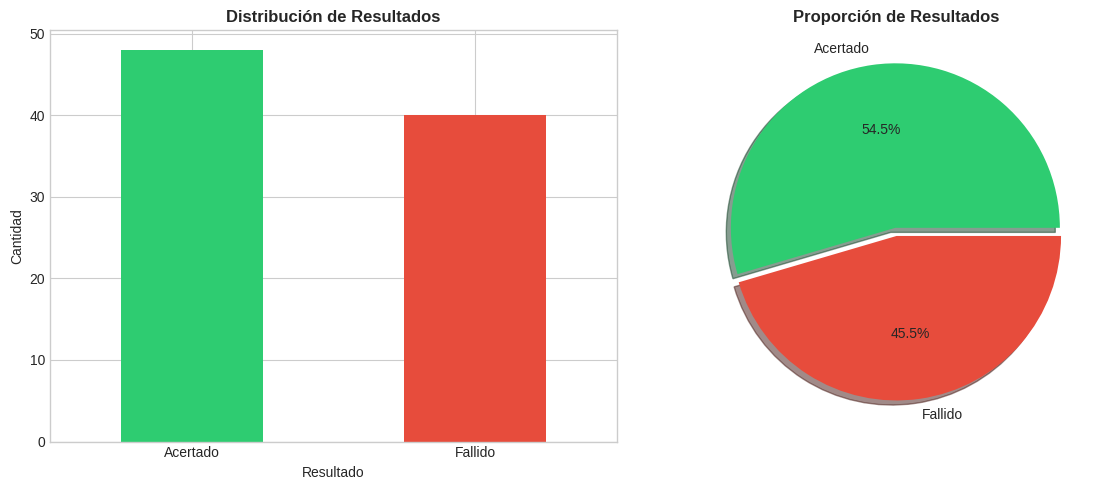

In [2]:
# Análisis de la variable objetivo: Resultado
print("=" * 60)
print("🎯 DISTRIBUCIÓN DE RESULTADOS (Variable Objetivo)")
print("=" * 60)

resultado_counts = df['Resultado'].value_counts()
resultado_pct = df['Resultado'].value_counts(normalize=True) * 100

print(f"\n📊 Distribución de Resultados:")
print(f"   ✅ Acertados: {resultado_counts.get('Acertado', 0)} ({resultado_pct.get('Acertado', 0):.1f}%)")
print(f"   ❌ Fallidos:  {resultado_counts.get('Fallido', 0)} ({resultado_pct.get('Fallido', 0):.1f}%)")

# Crear variable binaria para análisis
df['Acertado'] = (df['Resultado'] == 'Acertado').astype(int)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
colors = ['#2ecc71', '#e74c3c']
resultado_counts.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Distribución de Resultados', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Resultado')
axes[0].set_ylabel('Cantidad')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico de pastel
axes[1].pie(resultado_counts, labels=resultado_counts.index, autopct='%1.1f%%', 
            colors=colors, explode=(0.05, 0), shadow=True)
axes[1].set_title('Proporción de Resultados', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Análisis Estadístico de Variables Clave

Analizaremos en detalle las tres variables más importantes para la estrategia:
- **Score_Final**: Indicador compuesto de valor
- **Diferencia_Cuota_Promedio**: Diferencia entre mejor cuota y promedio del mercado
- **Volatilidad_Pct**: Dispersión de cuotas entre casas de apuestas

In [5]:
# Análisis estadístico profundo de variables clave
print("=" * 70)
print("📊 ANÁLISIS ESTADÍSTICO DETALLADO DE VARIABLES CLAVE")
print("=" * 70)

key_vars = ['Score_Final', 'Diferencia_Cuota_Promedio', 'Volatilidad_Pct', 
            'Margen_Casa_Pct', 'Cuota_Promedio_Mercado', 'Mejor_Cuota']

for var in key_vars:
    print(f"\n{'='*50}")
    print(f"📈 {var}")
    print(f"{'='*50}")
    
    data = df[var]
    
    print(f"   📍 Media:              {data.mean():.4f}")
    print(f"   📍 Mediana:            {data.median():.4f}")
    print(f"   📍 Desv. Estándar:     {data.std():.4f}")
    print(f"   📍 Mínimo:             {data.min():.4f}")
    print(f"   📍 Máximo:             {data.max():.4f}")
    print(f"   📍 Rango:              {data.max() - data.min():.4f}")
    print(f"   📍 Asimetría (Skew):   {stats.skew(data):.4f}")
    print(f"   📍 Curtosis:           {stats.kurtosis(data):.4f}")
    print(f"\n   📊 Percentiles:")
    print(f"      P10: {data.quantile(0.10):.4f}")
    print(f"      P25: {data.quantile(0.25):.4f}")
    print(f"      P50: {data.quantile(0.50):.4f}")
    print(f"      P75: {data.quantile(0.75):.4f}")
    print(f"      P90: {data.quantile(0.90):.4f}")

📊 ANÁLISIS ESTADÍSTICO DETALLADO DE VARIABLES CLAVE

📈 Score_Final
   📍 Media:              0.3264
   📍 Mediana:            0.2281
   📍 Desv. Estándar:     0.2940
   📍 Mínimo:             -0.1299
   📍 Máximo:             0.8799
   📍 Rango:              1.0098
   📍 Asimetría (Skew):   0.1613
   📍 Curtosis:           -1.3516

   📊 Percentiles:
      P10: -0.0533
      P25: 0.0954
      P50: 0.2281
      P75: 0.5692
      P90: 0.7097

📈 Diferencia_Cuota_Promedio
   📍 Media:              0.0258
   📍 Mediana:            0.0200
   📍 Desv. Estándar:     0.0182
   📍 Mínimo:             0.0000
   📍 Máximo:             0.0775
   📍 Rango:              0.0775
   📍 Asimetría (Skew):   0.8789
   📍 Curtosis:           0.1673

   📊 Percentiles:
      P10: 0.0050
      P25: 0.0100
      P50: 0.0200
      P75: 0.0375
      P90: 0.0490

📈 Volatilidad_Pct
   📍 Media:              1.1365
   📍 Mediana:            1.0400
   📍 Desv. Estándar:     0.6323
   📍 Mínimo:             0.0000
   📍 Máximo:            

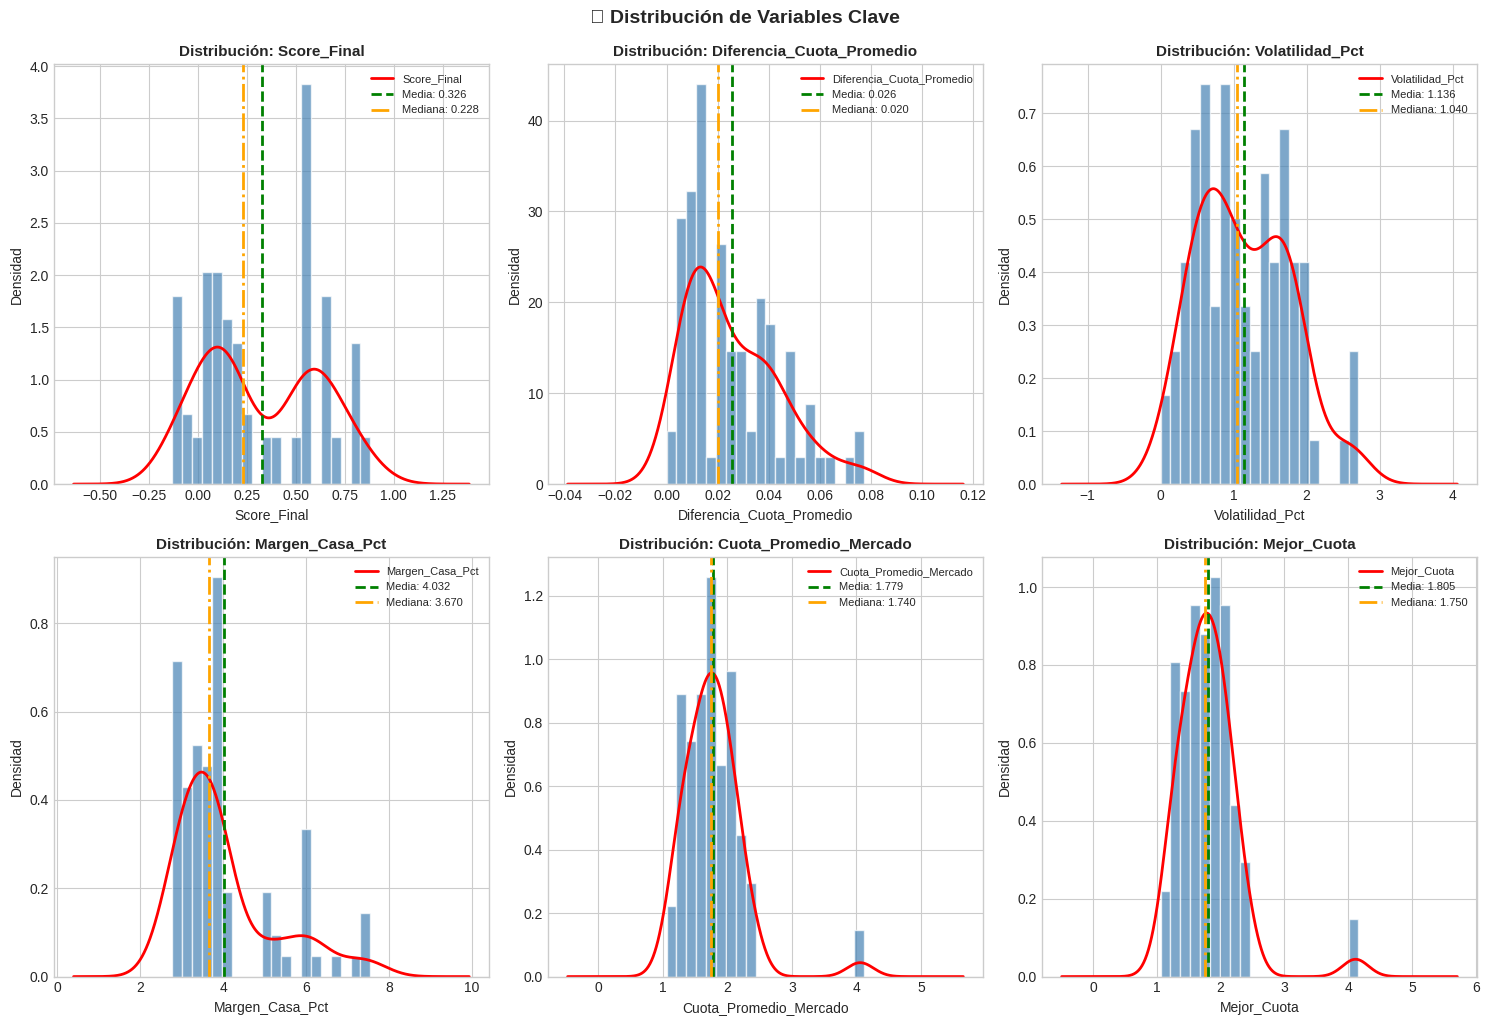

In [6]:
# Distribución de variables clave - Histogramas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(key_vars):
    ax = axes[i]
    
    # Histograma con KDE
    ax.hist(df[var], bins=20, edgecolor='white', alpha=0.7, color='steelblue', density=True)
    df[var].plot(kind='kde', ax=ax, color='red', linewidth=2)
    
    # Líneas de referencia
    ax.axvline(df[var].mean(), color='green', linestyle='--', linewidth=2, label=f'Media: {df[var].mean():.3f}')
    ax.axvline(df[var].median(), color='orange', linestyle='-.', linewidth=2, label=f'Mediana: {df[var].median():.3f}')
    
    ax.set_title(f'Distribución: {var}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.set_xlabel(var)
    ax.set_ylabel('Densidad')

plt.tight_layout()
plt.suptitle('📊 Distribución de Variables Clave', fontsize=14, fontweight='bold', y=1.02)
plt.show()

## 4. Análisis de Correlación entre Variables

Identificaremos las relaciones entre todas las variables numéricas para entender qué factores están más relacionados con el éxito de las apuestas.

🔗 MATRIZ DE CORRELACIÓN


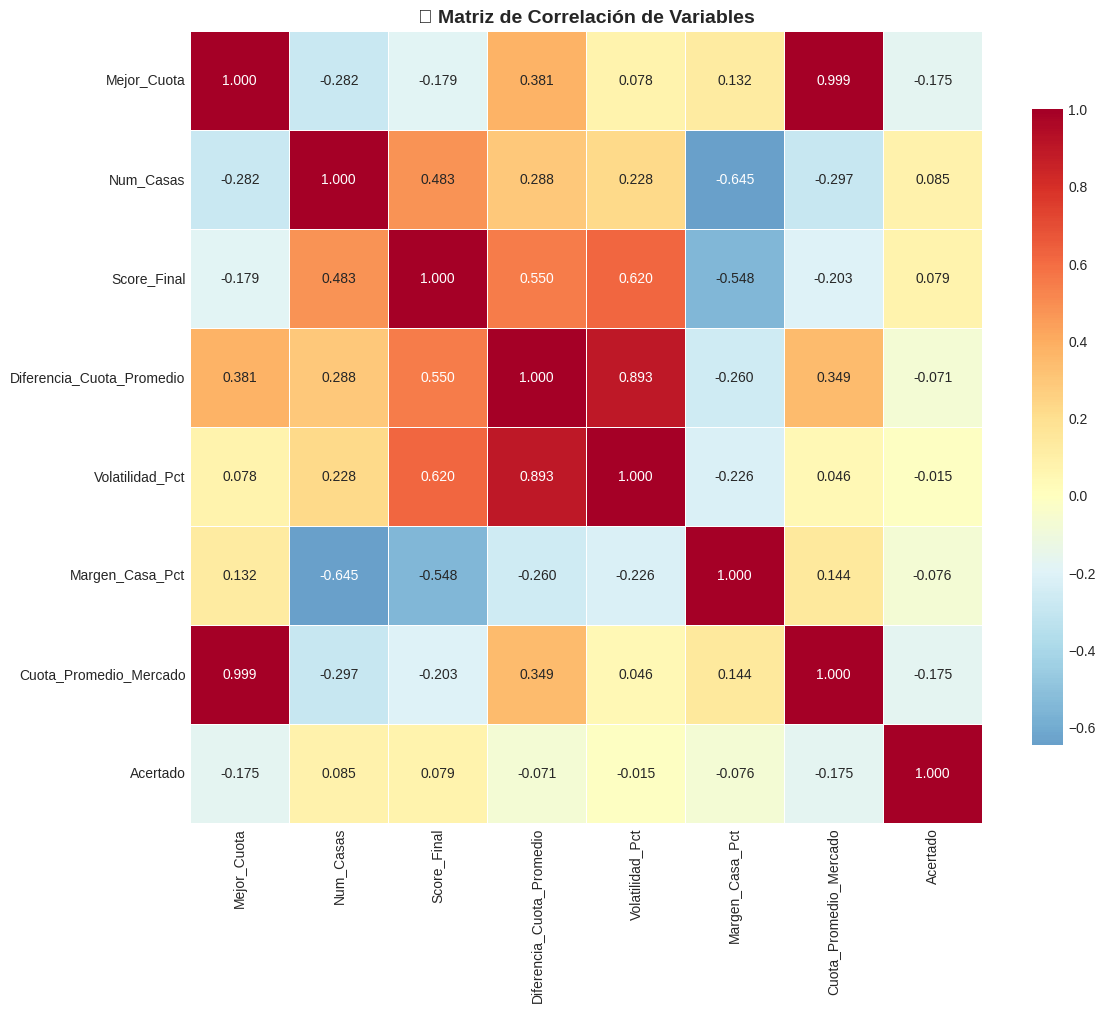


📊 CORRELACIONES CON 'ACERTADO' (Variable Objetivo):
--------------------------------------------------
   ⚪ Num_Casas                     : +0.0850
   ⚪ Score_Final                   : +0.0795
   ⚪ Volatilidad_Pct               : -0.0149
   ⚪ Diferencia_Cuota_Promedio     : -0.0712
   ⚪ Margen_Casa_Pct               : -0.0758
   🔴 Cuota_Promedio_Mercado        : -0.1748
   🔴 Mejor_Cuota                   : -0.1750


In [3]:
# Matriz de correlación
print("=" * 70)
print("🔗 MATRIZ DE CORRELACIÓN")
print("=" * 70)

# Variables para correlación (incluyendo la variable objetivo binaria)
corr_vars = ['Mejor_Cuota', 'Num_Casas', 'Score_Final', 'Diferencia_Cuota_Promedio', 
             'Volatilidad_Pct', 'Margen_Casa_Pct', 'Cuota_Promedio_Mercado', 'Acertado']

correlation_matrix = df[corr_vars].corr()

# Heatmap de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.3f', square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('🔗 Matriz de Correlación de Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
print("\n📊 CORRELACIONES CON 'ACERTADO' (Variable Objetivo):")
print("-" * 50)
corr_with_target = correlation_matrix['Acertado'].drop('Acertado').sort_values(ascending=False)
for var, corr in corr_with_target.items():
    emoji = "🟢" if corr > 0.1 else ("🔴" if corr < -0.1 else "⚪")
    print(f"   {emoji} {var:30s}: {corr:+.4f}")

## 5. Segmentación por Score_Final

Dividiremos el dataset en segmentos según rangos de Score_Final para identificar qué rangos presentan mejores oportunidades de éxito.

📊 SEGMENTACIÓN POR SCORE_FINAL

📈 RENDIMIENTO POR SEGMENTO DE SCORE_FINAL:
----------------------------------------------------------------------
                  Total  Acertados  Tasa_Acierto  Cuota_Promedio  Volatilidad_Media  Margen_Medio  ROI_Teorico
Score_Segmento                                                                                                
Negativo (<0)        11          4        0.3636          2.1718             0.6291        5.4909   -21.033352
Muy Bajo (0-0.2)     33         18        0.5455          1.7600             0.8464        4.3879    -3.992000
Bajo (0.2-0.4)        5          3        0.6000          2.1100             0.8420        3.2320    26.600000
Medio (0.4-0.6)      21         13        0.6190          1.6533             1.5052        3.5771     2.339270
Alto (0.6-0.8)       16          9        0.5625          1.7894             1.6100        3.1688     0.653750
Muy Alto (>0.8)       2          1        0.5000          1.4850             

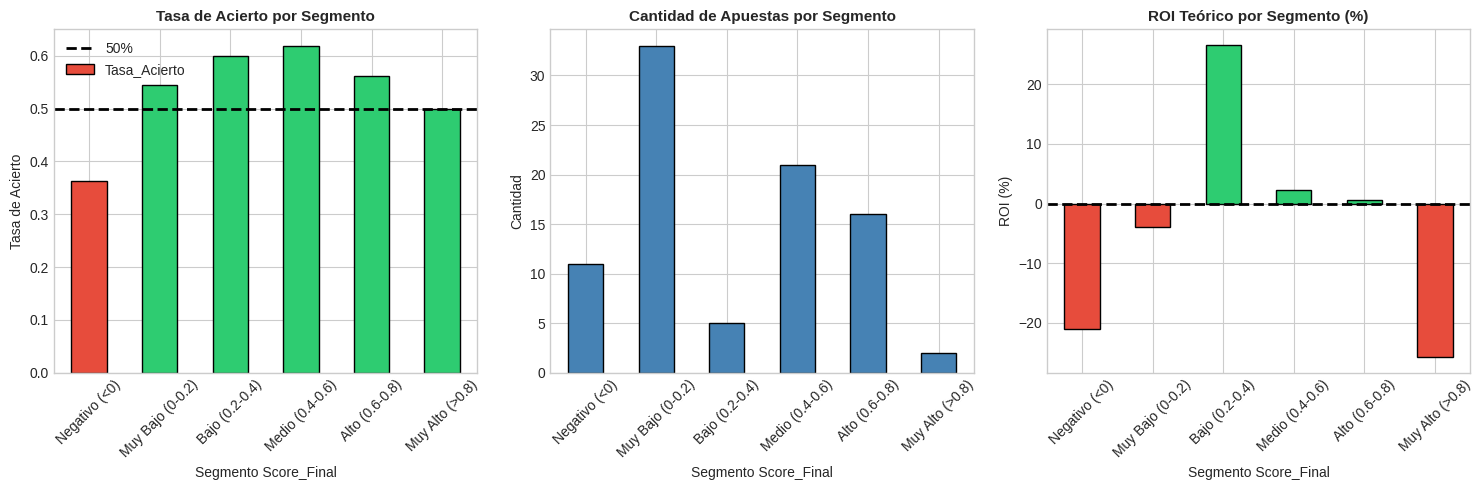

In [4]:
# Segmentación por Score_Final
print("=" * 70)
print("📊 SEGMENTACIÓN POR SCORE_FINAL")
print("=" * 70)

# Crear rangos de Score_Final
bins = [-np.inf, 0, 0.2, 0.4, 0.6, 0.8, np.inf]
labels = ['Negativo (<0)', 'Muy Bajo (0-0.2)', 'Bajo (0.2-0.4)', 
          'Medio (0.4-0.6)', 'Alto (0.6-0.8)', 'Muy Alto (>0.8)']

df['Score_Segmento'] = pd.cut(df['Score_Final'], bins=bins, labels=labels)

# Análisis por segmento
print("\n📈 RENDIMIENTO POR SEGMENTO DE SCORE_FINAL:")
print("-" * 70)

segmento_analysis = df.groupby('Score_Segmento', observed=True).agg({
    'Acertado': ['count', 'sum', 'mean'],
    'Mejor_Cuota': 'mean',
    'Volatilidad_Pct': 'mean',
    'Margen_Casa_Pct': 'mean'
}).round(4)

segmento_analysis.columns = ['Total', 'Acertados', 'Tasa_Acierto', 
                              'Cuota_Promedio', 'Volatilidad_Media', 'Margen_Medio']

# Calcular ROI teórico (asumiendo apuesta unitaria)
segmento_analysis['ROI_Teorico'] = (
    segmento_analysis['Tasa_Acierto'] * segmento_analysis['Cuota_Promedio'] - 1
) * 100

print(segmento_analysis.to_string())

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de barras - Tasa de acierto por segmento
colors_tasa = ['#e74c3c' if x < 0.5 else '#2ecc71' for x in segmento_analysis['Tasa_Acierto']]
ax1 = axes[0]
segmento_analysis['Tasa_Acierto'].plot(kind='bar', ax=ax1, color=colors_tasa, edgecolor='black')
ax1.axhline(y=0.5, color='black', linestyle='--', linewidth=2, label='50%')
ax1.set_title('Tasa de Acierto por Segmento', fontsize=11, fontweight='bold')
ax1.set_xlabel('Segmento Score_Final')
ax1.set_ylabel('Tasa de Acierto')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Gráfico de barras - Cantidad por segmento
ax2 = axes[1]
segmento_analysis['Total'].plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Cantidad de Apuestas por Segmento', fontsize=11, fontweight='bold')
ax2.set_xlabel('Segmento Score_Final')
ax2.set_ylabel('Cantidad')
ax2.tick_params(axis='x', rotation=45)

# Gráfico de barras - ROI por segmento
colors_roi = ['#e74c3c' if x < 0 else '#2ecc71' for x in segmento_analysis['ROI_Teorico']]
ax3 = axes[2]
segmento_analysis['ROI_Teorico'].plot(kind='bar', ax=ax3, color=colors_roi, edgecolor='black')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax3.set_title('ROI Teórico por Segmento (%)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Segmento Score_Final')
ax3.set_ylabel('ROI (%)')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Análisis de Diferencia_Cuota_Promedio vs Volatilidad_Pct

Exploramos la relación entre estas dos variables para identificar zonas de valor esperado positivo.

📊 ANÁLISIS BIVARIADO: DIFERENCIA VS VOLATILIDAD


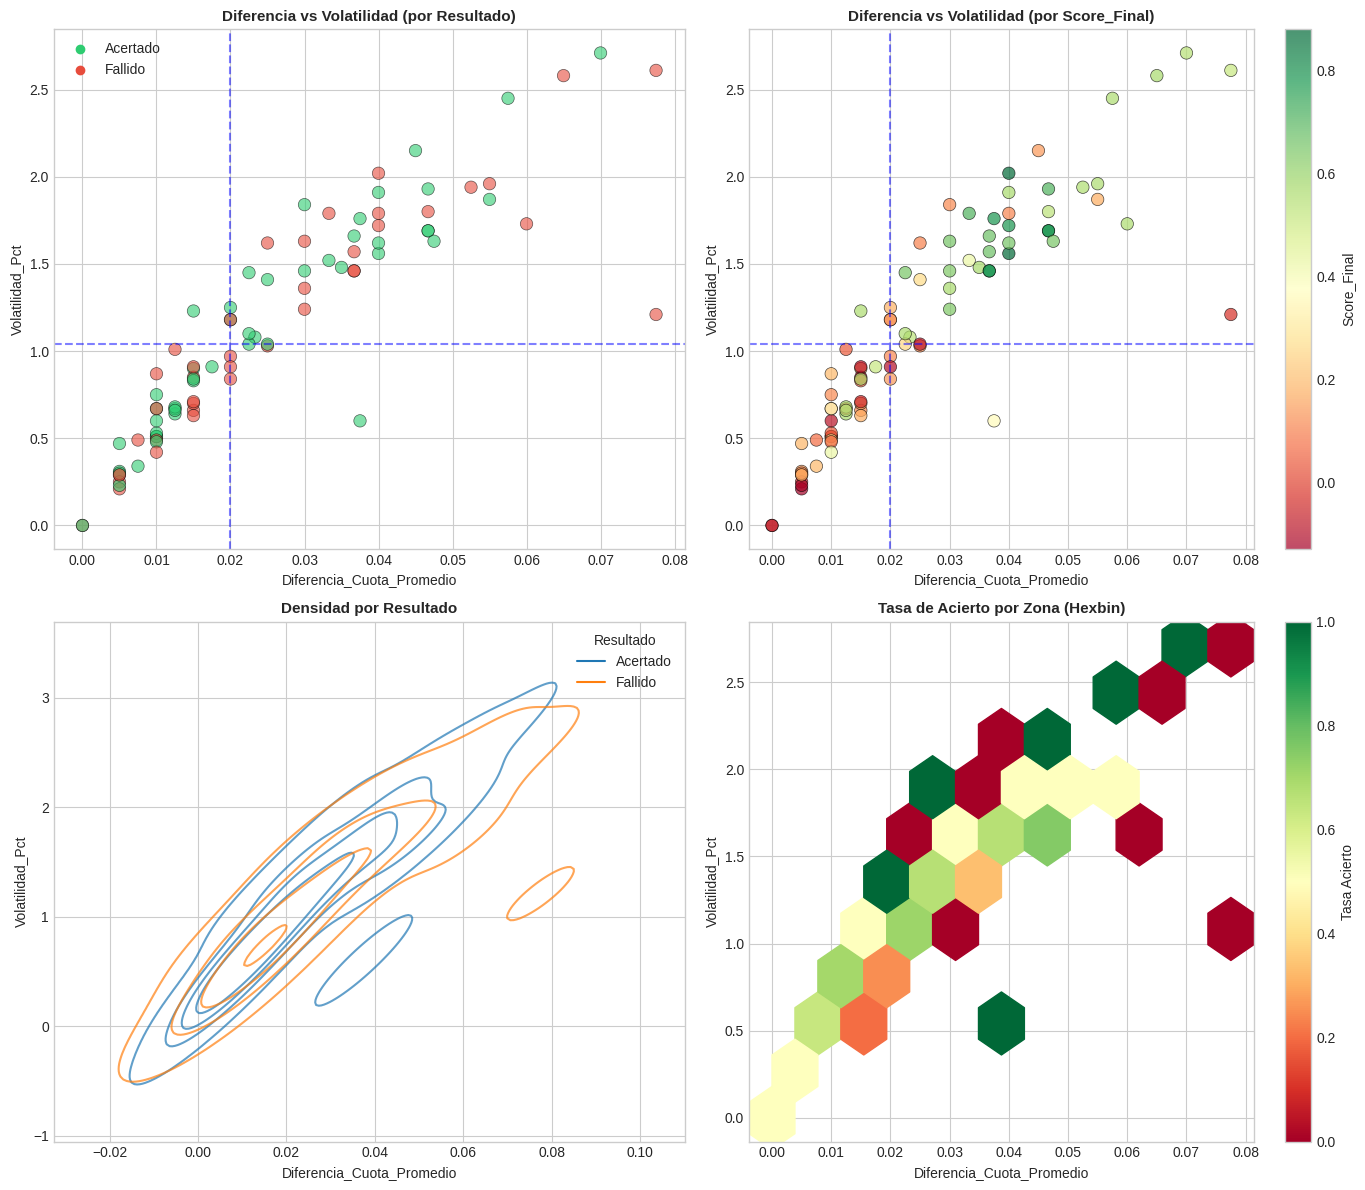


📊 ANÁLISIS POR CUADRANTES:
   Mediana Diferencia: 0.0200
   Mediana Volatilidad: 1.0400
--------------------------------------------------
                      Total  Acertados  Tasa_Acierto  Cuota_Media        ROI
Cuadrante                                                                   
Alta Diff / Alta Vol     44         25        0.5682       1.8507   5.156774
Alta Diff / Baja Vol      5          1        0.2000       2.6620 -46.760000
Baja Diff / Alta Vol      1          1        1.0000       1.2300  23.000000
Baja Diff / Baja Vol     38         21        0.5526       1.6545  -8.572330


In [9]:
# Análisis bivariado: Diferencia_Cuota_Promedio vs Volatilidad_Pct
print("=" * 70)
print("📊 ANÁLISIS BIVARIADO: DIFERENCIA VS VOLATILIDAD")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plot con resultado
ax1 = axes[0, 0]
colors_result = df['Acertado'].map({1: '#2ecc71', 0: '#e74c3c'})
scatter = ax1.scatter(df['Diferencia_Cuota_Promedio'], df['Volatilidad_Pct'], 
                       c=colors_result, alpha=0.6, edgecolors='black', linewidths=0.5, s=80)
ax1.set_xlabel('Diferencia_Cuota_Promedio')
ax1.set_ylabel('Volatilidad_Pct')
ax1.set_title('Diferencia vs Volatilidad (por Resultado)', fontsize=11, fontweight='bold')
ax1.legend(handles=[plt.scatter([], [], c='#2ecc71', label='Acertado'),
                    plt.scatter([], [], c='#e74c3c', label='Fallido')])

# Scatter plot con Score_Final como color
ax2 = axes[0, 1]
scatter2 = ax2.scatter(df['Diferencia_Cuota_Promedio'], df['Volatilidad_Pct'], 
                        c=df['Score_Final'], cmap='RdYlGn', alpha=0.7, 
                        edgecolors='black', linewidths=0.5, s=80)
ax2.set_xlabel('Diferencia_Cuota_Promedio')
ax2.set_ylabel('Volatilidad_Pct')
ax2.set_title('Diferencia vs Volatilidad (por Score_Final)', fontsize=11, fontweight='bold')
plt.colorbar(scatter2, ax=ax2, label='Score_Final')

# Análisis por cuadrantes
median_diff = df['Diferencia_Cuota_Promedio'].median()
median_vol = df['Volatilidad_Pct'].median()

ax1.axvline(x=median_diff, color='blue', linestyle='--', alpha=0.5)
ax1.axhline(y=median_vol, color='blue', linestyle='--', alpha=0.5)
ax2.axvline(x=median_diff, color='blue', linestyle='--', alpha=0.5)
ax2.axhline(y=median_vol, color='blue', linestyle='--', alpha=0.5)

# Densidad 2D
ax3 = axes[1, 0]
sns.kdeplot(data=df, x='Diferencia_Cuota_Promedio', y='Volatilidad_Pct', 
            hue='Resultado', ax=ax3, levels=5, alpha=0.7)
ax3.set_title('Densidad por Resultado', fontsize=11, fontweight='bold')

# Hexbin
ax4 = axes[1, 1]
hb = ax4.hexbin(df['Diferencia_Cuota_Promedio'], df['Volatilidad_Pct'], 
                C=df['Acertado'], gridsize=10, cmap='RdYlGn', mincnt=1, 
                reduce_C_function=np.mean)
ax4.set_xlabel('Diferencia_Cuota_Promedio')
ax4.set_ylabel('Volatilidad_Pct')
ax4.set_title('Tasa de Acierto por Zona (Hexbin)', fontsize=11, fontweight='bold')
plt.colorbar(hb, ax=ax4, label='Tasa Acierto')

plt.tight_layout()
plt.show()

# Análisis por cuadrantes
print("\n📊 ANÁLISIS POR CUADRANTES:")
print(f"   Mediana Diferencia: {median_diff:.4f}")
print(f"   Mediana Volatilidad: {median_vol:.4f}")
print("-" * 50)

# Crear cuadrantes
df['Cuadrante'] = np.where(
    (df['Diferencia_Cuota_Promedio'] >= median_diff) & (df['Volatilidad_Pct'] >= median_vol), 'Alta Diff / Alta Vol',
    np.where((df['Diferencia_Cuota_Promedio'] >= median_diff) & (df['Volatilidad_Pct'] < median_vol), 'Alta Diff / Baja Vol',
    np.where((df['Diferencia_Cuota_Promedio'] < median_diff) & (df['Volatilidad_Pct'] >= median_vol), 'Baja Diff / Alta Vol',
    'Baja Diff / Baja Vol'))
)

cuadrante_stats = df.groupby('Cuadrante').agg({
    'Acertado': ['count', 'sum', 'mean'],
    'Mejor_Cuota': 'mean'
}).round(4)
cuadrante_stats.columns = ['Total', 'Acertados', 'Tasa_Acierto', 'Cuota_Media']
cuadrante_stats['ROI'] = (cuadrante_stats['Tasa_Acierto'] * cuadrante_stats['Cuota_Media'] - 1) * 100

print(cuadrante_stats.to_string())

## 7. Identificación de Umbrales Óptimos para Decisión

Usaremos análisis de percentiles y técnicas estadísticas para encontrar los puntos de corte óptimos en cada variable.

In [10]:
# Búsqueda de umbrales óptimos
print("=" * 70)
print("🎯 BÚSQUEDA DE UMBRALES ÓPTIMOS")
print("=" * 70)

def find_optimal_threshold(df, variable, target='Acertado'):
    """Encuentra el umbral óptimo para maximizar la diferencia en tasa de acierto"""
    results = []
    
    percentiles = [10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90]
    
    for p in percentiles:
        threshold = df[variable].quantile(p/100)
        above = df[df[variable] >= threshold]
        below = df[df[variable] < threshold]
        
        if len(above) > 0 and len(below) > 0:
            rate_above = above[target].mean()
            rate_below = below[target].mean()
            count_above = len(above)
            count_below = len(below)
            
            results.append({
                'Percentil': p,
                'Umbral': threshold,
                'Tasa_Arriba': rate_above,
                'Tasa_Abajo': rate_below,
                'Diferencia': rate_above - rate_below,
                'N_Arriba': count_above,
                'N_Abajo': count_below
            })
    
    return pd.DataFrame(results)

# Análisis para cada variable clave
variables_analizar = ['Score_Final', 'Diferencia_Cuota_Promedio', 'Volatilidad_Pct', 
                      'Margen_Casa_Pct', 'Num_Casas']

umbrales_optimos = {}

for var in variables_analizar:
    print(f"\n{'='*50}")
    print(f"📊 Análisis de umbral: {var}")
    print(f"{'='*50}")
    
    result = find_optimal_threshold(df, var)
    print(result.round(4).to_string(index=False))
    
    # Encontrar mejor umbral (máxima diferencia positiva con suficiente muestra)
    valid_results = result[result['N_Arriba'] >= 5]
    if len(valid_results) > 0:
        best_idx = valid_results['Diferencia'].abs().idxmax()
        best = result.loc[best_idx]
        umbrales_optimos[var] = {
            'umbral': best['Umbral'],
            'percentil': best['Percentil'],
            'direccion': 'mayor' if best['Diferencia'] > 0 else 'menor'
        }
        print(f"\n   ⭐ Mejor umbral: {best['Umbral']:.4f} (P{best['Percentil']})")
        print(f"   📈 Dirección favorable: {'≥' if best['Diferencia'] > 0 else '<'} umbral")

print("\n" + "=" * 70)
print("📋 RESUMEN DE UMBRALES ÓPTIMOS")
print("=" * 70)
for var, info in umbrales_optimos.items():
    symbol = '≥' if info['direccion'] == 'mayor' else '<'
    print(f"   {var}: {symbol} {info['umbral']:.4f} (P{info['percentil']})")

🎯 BÚSQUEDA DE UMBRALES ÓPTIMOS

📊 Análisis de umbral: Score_Final
 Percentil  Umbral  Tasa_Arriba  Tasa_Abajo  Diferencia  N_Arriba  N_Abajo
        10 -0.0533       0.5570      0.4444      0.1125        79        9
        20  0.0593       0.5571      0.5000      0.0571        70       18
        25  0.0954       0.5606      0.5000      0.0606        66       22
        30  0.1171       0.5806      0.4615      0.1191        62       26
        40  0.1440       0.5741      0.5000      0.0741        54       34
        50  0.2281       0.5909      0.5000      0.0909        44       44
        60  0.5145       0.6000      0.5094      0.0906        35       53
        70  0.5634       0.5556      0.5410      0.0146        27       61
        75  0.5692       0.5652      0.5385      0.0268        23       65
        80  0.6110       0.5556      0.5429      0.0127        18       70
        90  0.7097       0.5000      0.5513     -0.0513        10       78

   ⭐ Mejor umbral: 0.1171 (P30.0)

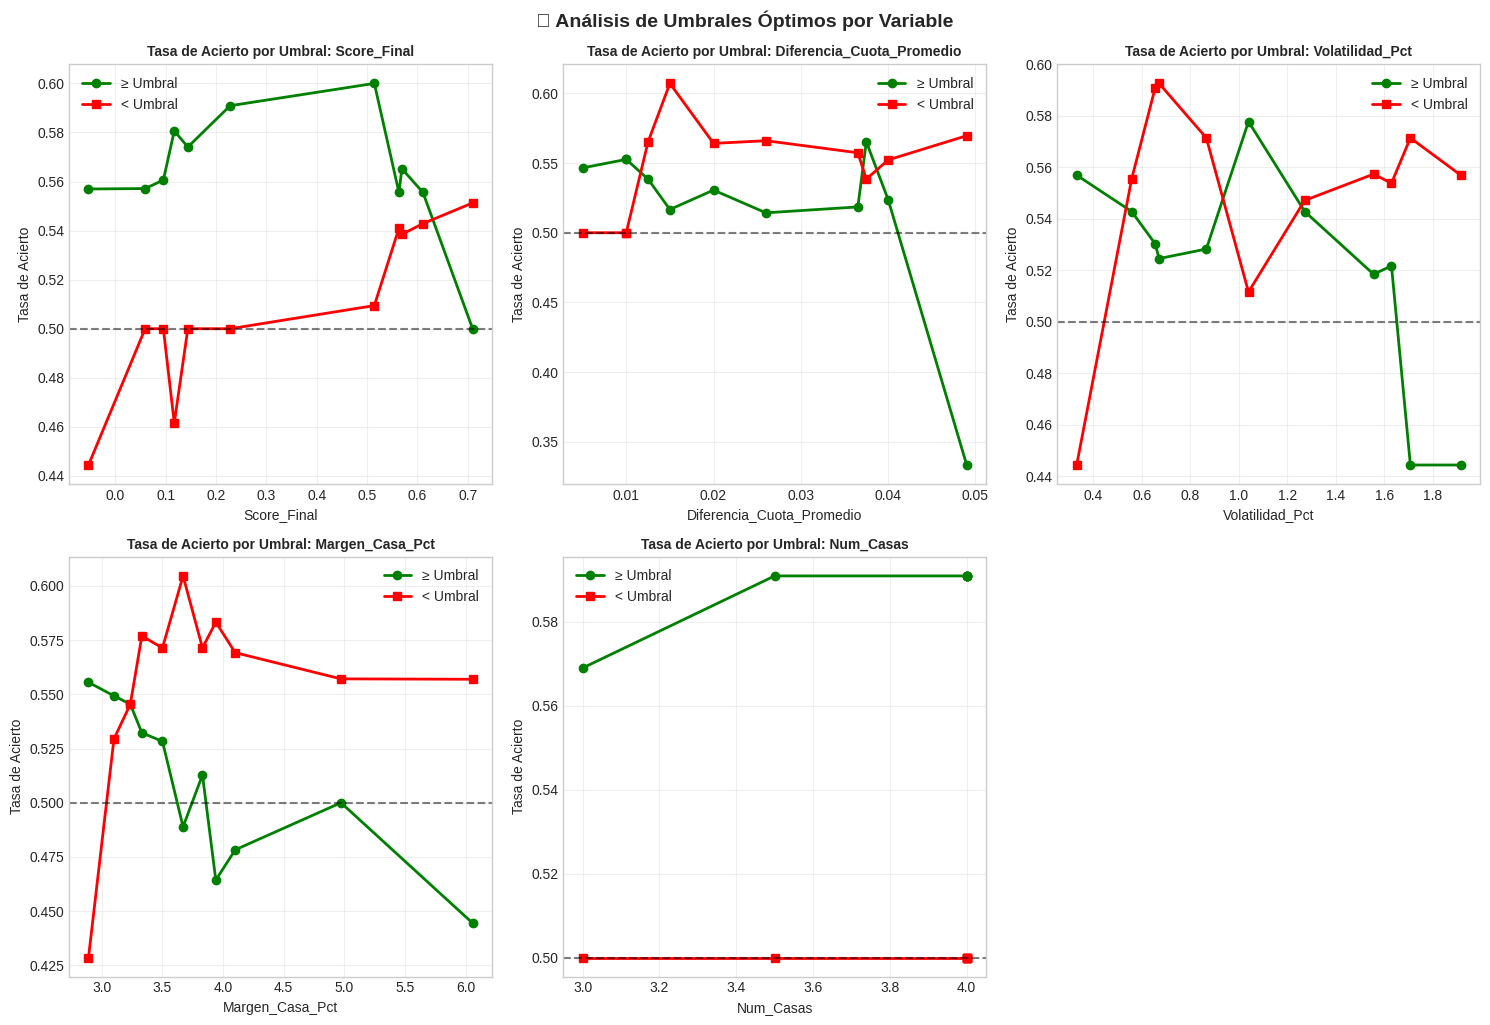

In [11]:
# Visualización de la curva de tasa de acierto por umbral
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(variables_analizar):
    ax = axes[i]
    result = find_optimal_threshold(df, var)
    
    ax.plot(result['Umbral'], result['Tasa_Arriba'], 'g-o', label='≥ Umbral', linewidth=2, markersize=6)
    ax.plot(result['Umbral'], result['Tasa_Abajo'], 'r-s', label='< Umbral', linewidth=2, markersize=6)
    ax.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
    
    ax.set_xlabel(var)
    ax.set_ylabel('Tasa de Acierto')
    ax.set_title(f'Tasa de Acierto por Umbral: {var}', fontsize=10, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Eliminar subplot vacío
axes[5].axis('off')

plt.tight_layout()
plt.suptitle('📊 Análisis de Umbrales Óptimos por Variable', fontsize=14, fontweight='bold', y=1.02)
plt.show()

## 8. Creación de Reglas de Decisión para Apuestas

Definimos reglas condicionales basadas en los análisis anteriores para determinar:
1. **Cuándo apostar** (señal de entrada)
2. **Nivel de confianza** (alto, medio, bajo)
3. **Cuánto apostar** (gestión del bankroll)
4. **Cuándo NO apostar** (señales de alerta)

In [5]:
# Definición de reglas de decisión
print("=" * 70)
print("📋 DEFINICIÓN DE REGLAS DE DECISIÓN PARA APUESTAS")
print("=" * 70)

def clasificar_apuesta(row):
    """
    Sistema de clasificación de apuestas basado en múltiples criterios.
    Retorna: nivel de confianza y recomendación
    """
    score = row['Score_Final']
    diff = row['Diferencia_Cuota_Promedio']
    vol = row['Volatilidad_Pct']
    margen = row['Margen_Casa_Pct']
    casas = row['Num_Casas']
    cuota = row['Mejor_Cuota']
    
    puntos = 0
    razones = []
    alertas = []
    
    # Criterio 1: Score_Final (peso alto)
    if score >= 0.6:
        puntos += 3
        razones.append("Score alto (≥0.6)")
    elif score >= 0.4:
        puntos += 2
        razones.append("Score medio (0.4-0.6)")
    elif score >= 0.2:
        puntos += 1
        razones.append("Score bajo (0.2-0.4)")
    elif score < 0:
        puntos -= 2
        alertas.append("⚠️ Score negativo")
    
    # Criterio 2: Diferencia_Cuota_Promedio (valor)
    if diff >= 0.04:
        puntos += 2
        razones.append("Buena diferencia de cuota")
    elif diff >= 0.02:
        puntos += 1
        razones.append("Diferencia de cuota aceptable")
    elif diff < 0.01:
        alertas.append("⚠️ Diferencia de cuota muy baja")
    
    # Criterio 3: Volatilidad (consenso del mercado)
    if vol <= 1.0:
        puntos += 2
        razones.append("Baja volatilidad (consenso)")
    elif vol <= 1.5:
        puntos += 1
        razones.append("Volatilidad moderada")
    elif vol > 2.0:
        alertas.append("⚠️ Alta volatilidad")
    
    # Criterio 4: Margen de la casa
    if margen <= 3.0:
        puntos += 1
        razones.append("Margen de casa bajo")
    elif margen > 5.0:
        alertas.append("⚠️ Margen de casa alto")
        puntos -= 1
    
    # Criterio 5: Número de casas (liquidez)
    if casas >= 4:
        puntos += 1
        razones.append("Buena liquidez (≥4 casas)")
    elif casas <= 2:
        alertas.append("⚠️ Poca liquidez")
    
    # Criterio 6: Cuota (riesgo/beneficio)
    if 1.3 <= cuota <= 2.5:
        puntos += 1
        razones.append("Cuota en rango óptimo")
    elif cuota > 3.0:
        alertas.append("⚠️ Cuota alta (mayor riesgo)")
    
    # Clasificación final
    if puntos >= 7:
        nivel = "🟢 ALTA CONFIANZA"
        accion = "APOSTAR (2-3% bankroll)"
    elif puntos >= 5:
        nivel = "🟡 MEDIA CONFIANZA"
        accion = "APOSTAR (1-2% bankroll)"
    elif puntos >= 3:
        nivel = "🟠 BAJA CONFIANZA"
        accion = "CONSIDERAR (0.5-1% bankroll)"
    else:
        nivel = "🔴 SIN CONFIANZA"
        accion = "NO APOSTAR"
    
    return {
        'puntos': puntos,
        'nivel': nivel,
        'accion': accion,
        'razones': razones,
        'alertas': alertas
    }

# Aplicar clasificación a todo el dataset
df['Clasificacion'] = df.apply(clasificar_apuesta, axis=1)
df['Puntos_Confianza'] = df['Clasificacion'].apply(lambda x: x['puntos'])
df['Nivel_Confianza'] = df['Clasificacion'].apply(lambda x: x['nivel'])
df['Accion_Recomendada'] = df['Clasificacion'].apply(lambda x: x['accion'])

# Mostrar distribución de niveles
print("\n📊 DISTRIBUCIÓN DE NIVELES DE CONFIANZA:")
print("-" * 50)
nivel_counts = df['Nivel_Confianza'].value_counts()
for nivel, count in nivel_counts.items():
    pct = count / len(df) * 100
    print(f"   {nivel}: {count} ({pct:.1f}%)")

# Análisis de rendimiento por nivel de confianza
print("\n📈 RENDIMIENTO POR NIVEL DE CONFIANZA:")
print("-" * 70)
rendimiento = df.groupby('Nivel_Confianza').agg({
    'Acertado': ['count', 'sum', 'mean'],
    'Mejor_Cuota': 'mean',
    'Score_Final': 'mean'
}).round(4)
rendimiento.columns = ['Total', 'Acertados', 'Tasa_Acierto', 'Cuota_Media', 'Score_Medio']
rendimiento['ROI_Teorico'] = (rendimiento['Tasa_Acierto'] * rendimiento['Cuota_Media'] - 1) * 100
print(rendimiento.sort_values('Tasa_Acierto', ascending=False).to_string())

📋 DEFINICIÓN DE REGLAS DE DECISIÓN PARA APUESTAS

📊 DISTRIBUCIÓN DE NIVELES DE CONFIANZA:
--------------------------------------------------
   🟡 MEDIA CONFIANZA: 34 (38.6%)
   🔴 SIN CONFIANZA: 22 (25.0%)
   🟠 BAJA CONFIANZA: 21 (23.9%)
   🟢 ALTA CONFIANZA: 11 (12.5%)

📈 RENDIMIENTO POR NIVEL DE CONFIANZA:
----------------------------------------------------------------------
                   Total  Acertados  Tasa_Acierto  Cuota_Media  Score_Medio  ROI_Teorico
Nivel_Confianza                                                                         
🟡 MEDIA CONFIANZA     34         20        0.5882       1.7621       0.5082     3.646722
🟠 BAJA CONFIANZA      21         12        0.5714       1.7214       0.1481    -1.639204
🟢 ALTA CONFIANZA      11          6        0.5455       1.7482       0.7498    -4.635690
🔴 SIN CONFIANZA       22         10        0.4545       1.9795       0.0039   -10.031725


## 9. Backtesting de la Estrategia Propuesta

Simulamos la aplicación de las reglas de decisión sobre los datos históricos para evaluar el rendimiento teórico de la estrategia.

📊 BACKTESTING DE LA ESTRATEGIA DE APUESTAS

💰 RESULTADOS DEL BACKTESTING:
--------------------------------------------------
   Bankroll inicial:    $1,000.00
   Bankroll final:      $989.97
   Ganancia/Pérdida:    $-10.03
   ROI Total:           -1.00%
   Máximo Bankroll:     $1,116.29
   Mínimo Bankroll:     $973.86
   Drawdown Máximo:     12.76%
   Apuestas realizadas: 66

📈 DETALLE POR NIVEL DE CONFIANZA:
----------------------------------------------------------------------
                   Apuestas  Total_Apostado  Aciertos  Tasa_Acierto  Bankroll_Final
nivel                                                                              
🟠 BAJA CONFIANZA         21          175.42        12          0.57         1064.24
🟡 MEDIA CONFIANZA        34          528.37        20          0.59          989.97
🟢 ALTA CONFIANZA         11          284.32         6          0.55         1005.05


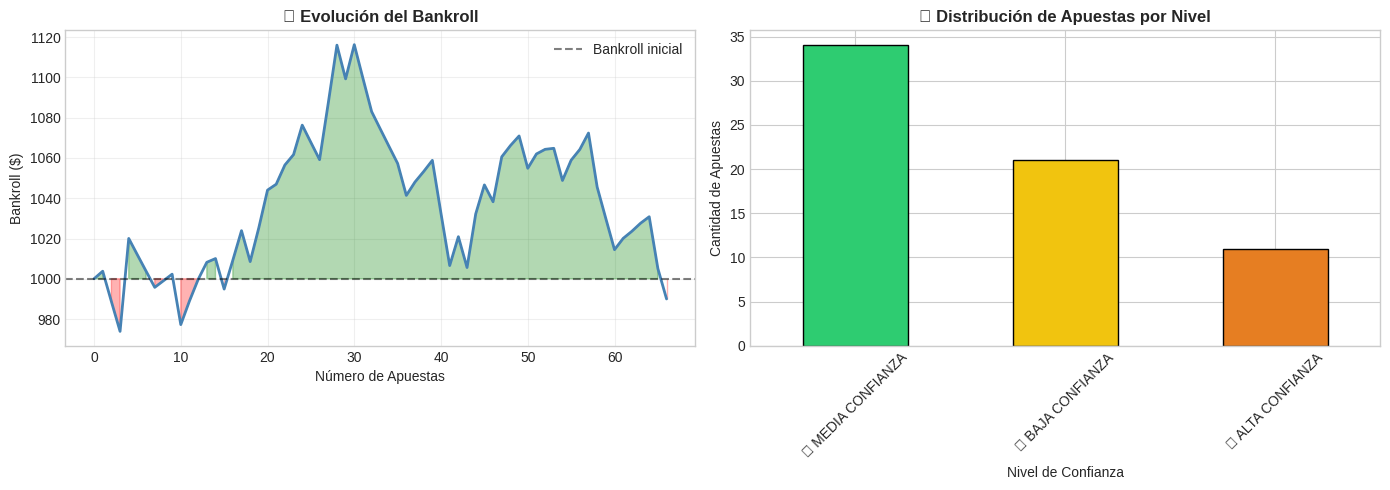

In [6]:
# Backtesting de la estrategia
print("=" * 70)
print("📊 BACKTESTING DE LA ESTRATEGIA DE APUESTAS")
print("=" * 70)

def simular_estrategia(df, bankroll_inicial=1000, stake_pct=None):
    """
    Simula la estrategia de apuestas con gestión de bankroll.
    stake_pct: diccionario con porcentajes por nivel de confianza
    """
    if stake_pct is None:
        stake_pct = {
            '🟢 ALTA CONFIANZA': 0.025,    # 2.5% del bankroll
            '🟡 MEDIA CONFIANZA': 0.015,   # 1.5% del bankroll
            '🟠 BAJA CONFIANZA': 0.008,    # 0.8% del bankroll
            '🔴 SIN CONFIANZA': 0.0        # No apostar
        }
    
    bankroll = bankroll_inicial
    historial = []
    max_bankroll = bankroll
    min_bankroll = bankroll
    
    for idx, row in df.iterrows():
        nivel = row['Nivel_Confianza']
        stake_ratio = stake_pct.get(nivel, 0)
        
        if stake_ratio > 0:
            stake = bankroll * stake_ratio
            cuota = row['Mejor_Cuota']
            acertado = row['Acertado']
            
            if acertado:
                ganancia = stake * (cuota - 1)
                bankroll += ganancia
            else:
                bankroll -= stake
            
            max_bankroll = max(max_bankroll, bankroll)
            min_bankroll = min(min_bankroll, bankroll)
            
            historial.append({
                'partido': row['Partido'],
                'nivel': nivel,
                'stake': stake,
                'cuota': cuota,
                'acertado': acertado,
                'bankroll': bankroll
            })
    
    return bankroll, historial, max_bankroll, min_bankroll

# Ejecutar simulación
bankroll_final, historial, max_br, min_br = simular_estrategia(df)

print(f"\n💰 RESULTADOS DEL BACKTESTING:")
print("-" * 50)
print(f"   Bankroll inicial:    $1,000.00")
print(f"   Bankroll final:      ${bankroll_final:,.2f}")
print(f"   Ganancia/Pérdida:    ${bankroll_final - 1000:+,.2f}")
print(f"   ROI Total:           {((bankroll_final/1000)-1)*100:+.2f}%")
print(f"   Máximo Bankroll:     ${max_br:,.2f}")
print(f"   Mínimo Bankroll:     ${min_br:,.2f}")
print(f"   Drawdown Máximo:     {((max_br - min_br)/max_br)*100:.2f}%")
print(f"   Apuestas realizadas: {len(historial)}")

# Análisis por nivel
print("\n📈 DETALLE POR NIVEL DE CONFIANZA:")
print("-" * 70)
historial_df = pd.DataFrame(historial)
if len(historial_df) > 0:
    nivel_detail = historial_df.groupby('nivel').agg({
        'stake': ['count', 'sum'],
        'acertado': ['sum', 'mean'],
        'bankroll': 'last'
    }).round(2)
    nivel_detail.columns = ['Apuestas', 'Total_Apostado', 'Aciertos', 'Tasa_Acierto', 'Bankroll_Final']
    print(nivel_detail.to_string())

# Gráfico de evolución del bankroll
if len(historial) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Evolución del bankroll
    ax1 = axes[0]
    bankroll_evolution = [1000] + [h['bankroll'] for h in historial]
    ax1.plot(bankroll_evolution, linewidth=2, color='steelblue')
    ax1.axhline(y=1000, color='black', linestyle='--', alpha=0.5, label='Bankroll inicial')
    ax1.fill_between(range(len(bankroll_evolution)), 1000, bankroll_evolution, 
                     where=[b >= 1000 for b in bankroll_evolution], alpha=0.3, color='green')
    ax1.fill_between(range(len(bankroll_evolution)), 1000, bankroll_evolution, 
                     where=[b < 1000 for b in bankroll_evolution], alpha=0.3, color='red')
    ax1.set_xlabel('Número de Apuestas')
    ax1.set_ylabel('Bankroll ($)')
    ax1.set_title('📈 Evolución del Bankroll', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Distribución de apuestas por nivel
    ax2 = axes[1]
    nivel_counts = historial_df['nivel'].value_counts()
    colors = ['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']
    nivel_counts.plot(kind='bar', ax=ax2, color=colors[:len(nivel_counts)], edgecolor='black')
    ax2.set_xlabel('Nivel de Confianza')
    ax2.set_ylabel('Cantidad de Apuestas')
    ax2.set_title('📊 Distribución de Apuestas por Nivel', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## 10. Visualización de Zonas de Oportunidad

Creamos visualizaciones que muestran las zonas donde convergen condiciones favorables para apostar.

In [ ]:
# Visualización de zonas de oportunidad
print("=" * 70)
print("🎯 ZONAS DE OPORTUNIDAD - ANÁLISIS MULTIVARIABLE")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Score_Final vs Mejor_Cuota con nivel de confianza
ax1 = axes[0, 0]
colors_nivel = {
    '🟢 ALTA CONFIANZA': '#2ecc71',
    '🟡 MEDIA CONFIANZA': '#f1c40f', 
    '🟠 BAJA CONFIANZA': '#e67e22',
    '🔴 SIN CONFIANZA': '#e74c3c'
}
for nivel, color in colors_nivel.items():
    mask = df['Nivel_Confianza'] == nivel
    ax1.scatter(df.loc[mask, 'Score_Final'], df.loc[mask, 'Mejor_Cuota'],
                c=color, label=nivel, alpha=0.7, s=80, edgecolors='black', linewidths=0.5)

ax1.axvline(x=0.4, color='green', linestyle='--', alpha=0.5, label='Umbral Score (0.4)')
ax1.axhline(y=2.0, color='blue', linestyle='--', alpha=0.5, label='Cuota 2.0')
ax1.set_xlabel('Score_Final')
ax1.set_ylabel('Mejor_Cuota')
ax1.set_title('Score_Final vs Cuota (por Nivel de Confianza)', fontsize=11, fontweight='bold')
ax1.legend(loc='upper right', fontsize=8)
ax1.grid(True, alpha=0.3)

# Zona de oportunidad
ax1.axvspan(0.4, df['Score_Final'].max() + 0.1, alpha=0.1, color='green')

# 2. Score_Final vs Volatilidad con resultado
ax2 = axes[0, 1]
scatter2 = ax2.scatter(df['Score_Final'], df['Volatilidad_Pct'], 
                        c=df['Acertado'], cmap='RdYlGn', alpha=0.7,
                        s=df['Mejor_Cuota']*40, edgecolors='black', linewidths=0.5)
ax2.set_xlabel('Score_Final')
ax2.set_ylabel('Volatilidad_Pct')
ax2.set_title('Score vs Volatilidad (color=Resultado, tamaño=Cuota)', fontsize=11, fontweight='bold')
plt.colorbar(scatter2, ax=ax2, label='Acertado')
ax2.grid(True, alpha=0.3)

# 3. Mapa de calor: Tasa de acierto por Score y Volatilidad
ax3 = axes[1, 0]
df['Score_Bin'] = pd.cut(df['Score_Final'], bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
df['Vol_Bin'] = pd.cut(df['Volatilidad_Pct'], bins=4, labels=['Muy Baja', 'Baja', 'Media', 'Alta'])

pivot_table = df.pivot_table(values='Acertado', index='Vol_Bin', columns='Score_Bin', 
                              aggfunc='mean', observed=True)
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', center=0.5, fmt='.2f',
            ax=ax3, vmin=0, vmax=1, cbar_kws={'label': 'Tasa de Acierto'})
ax3.set_title('🗺️ Mapa de Calor: Tasa de Acierto', fontsize=11, fontweight='bold')
ax3.set_xlabel('Segmento Score_Final')
ax3.set_ylabel('Segmento Volatilidad')

# 4. Mapa de calor: Cantidad de apuestas por zona
ax4 = axes[1, 1]
pivot_count = df.pivot_table(values='Acertado', index='Vol_Bin', columns='Score_Bin', 
                              aggfunc='count', observed=True)
sns.heatmap(pivot_count, annot=True, cmap='Blues', fmt='.0f',
            ax=ax4, cbar_kws={'label': 'Cantidad'})
ax4.set_title('📊 Cantidad de Apuestas por Zona', fontsize=11, fontweight='bold')
ax4.set_xlabel('Segmento Score_Final')
ax4.set_ylabel('Segmento Volatilidad')

plt.tight_layout()
plt.show()

# Análisis de las mejores zonas
print("\n🏆 MEJORES ZONAS DE OPORTUNIDAD:")
print("-" * 70)
zona_analysis = df.groupby(['Score_Bin', 'Vol_Bin'], observed=True).agg({
    'Acertado': ['count', 'mean'],
    'Mejor_Cuota': 'mean'
}).round(4)
zona_analysis.columns = ['N', 'Tasa_Acierto', 'Cuota_Media']
zona_analysis['ROI'] = (zona_analysis['Tasa_Acierto'] * zona_analysis['Cuota_Media'] - 1) * 100
zona_analysis = zona_analysis[zona_analysis['N'] >= 3].sort_values('ROI', ascending=False)
print(zona_analysis.head(10).to_string())

## 11. Sistema de Scoring Ponderado Personalizado

Desarrollamos una fórmula de scoring personalizada que combina todas las variables relevantes para generar una señal clara de apuesta.

⚡ SISTEMA DE SCORING PONDERADO PERSONALIZADO

📊 ESTADÍSTICAS DEL SCORE PONDERADO:
--------------------------------------------------
   Media:     53.60
   Mediana:   51.46
   Desv.Std:  12.83
   Mínimo:    32.73
   Máximo:    76.74

📈 RENDIMIENTO POR RATING:
----------------------------------------------------------------------
               Total  Acertados  Tasa_Acierto  Cuota_Media  Score_Medio        ROI
Rating                                                                            
❌ EVITAR          18          9        0.5000       1.9083      36.7994  -4.585000
⭐ REGULAR         28         13        0.4643       1.7982      46.2754 -16.509574
⭐⭐ BUENO          32         21        0.6562       1.7631      63.5234  15.694622
⭐⭐⭐ EXCELENTE     10          5        0.5000       1.7720      72.5750 -11.400000


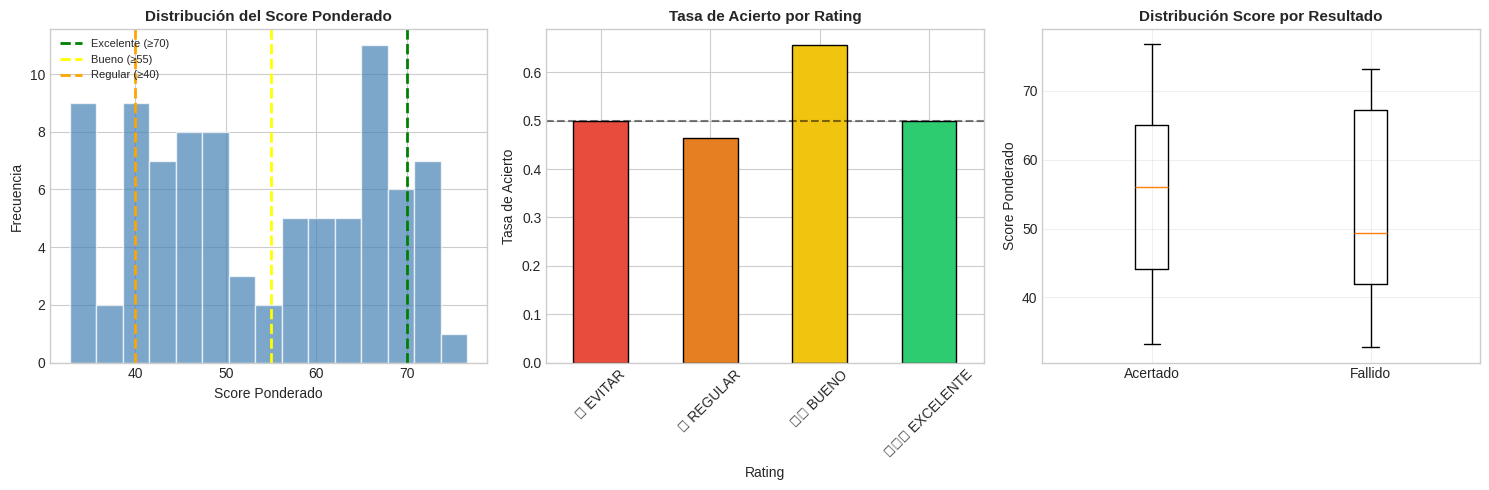

In [7]:
# Sistema de Scoring Ponderado
print("=" * 70)
print("⚡ SISTEMA DE SCORING PONDERADO PERSONALIZADO")
print("=" * 70)

def calcular_score_ponderado(row):
    """
    Calcula un score ponderado basado en todas las variables relevantes.
    Escala de 0 a 100.
    """
    # Normalización de variables
    score_norm = (row['Score_Final'] + 0.15) / 1.05  # Ajuste para valores negativos
    score_norm = max(0, min(1, score_norm))
    
    # Diferencia de cuota (mayor es mejor)
    diff_norm = min(1, row['Diferencia_Cuota_Promedio'] / 0.08)
    
    # Volatilidad (menor es mejor)
    vol_norm = 1 - min(1, row['Volatilidad_Pct'] / 3.0)
    
    # Margen de casa (menor es mejor)
    margen_norm = 1 - min(1, row['Margen_Casa_Pct'] / 8.0)
    
    # Número de casas (más es mejor, máximo beneficio en 4)
    casas_norm = min(1, row['Num_Casas'] / 4)
    
    # Cuota óptima (mejor entre 1.4 y 2.2)
    cuota = row['Mejor_Cuota']
    if 1.4 <= cuota <= 2.2:
        cuota_norm = 1.0
    elif cuota < 1.4:
        cuota_norm = max(0, (cuota - 1.0) / 0.4)
    else:
        cuota_norm = max(0, 1 - (cuota - 2.2) / 2.0)
    
    # Ponderaciones basadas en correlación con resultados
    pesos = {
        'score': 0.35,      # Peso alto para Score_Final
        'diff': 0.20,       # Peso medio para diferencia de cuota
        'vol': 0.15,        # Peso para volatilidad
        'margen': 0.10,     # Peso para margen
        'casas': 0.10,      # Peso para liquidez
        'cuota': 0.10       # Peso para rango de cuota
    }
    
    score_ponderado = (
        pesos['score'] * score_norm +
        pesos['diff'] * diff_norm +
        pesos['vol'] * vol_norm +
        pesos['margen'] * margen_norm +
        pesos['casas'] * casas_norm +
        pesos['cuota'] * cuota_norm
    ) * 100
    
    return round(score_ponderado, 2)

# Aplicar scoring ponderado
df['Score_Ponderado'] = df.apply(calcular_score_ponderado, axis=1)

# Clasificación por score ponderado
def clasificar_por_score(score):
    if score >= 70:
        return "⭐⭐⭐ EXCELENTE"
    elif score >= 55:
        return "⭐⭐ BUENO"
    elif score >= 40:
        return "⭐ REGULAR"
    else:
        return "❌ EVITAR"

df['Rating'] = df['Score_Ponderado'].apply(clasificar_por_score)

# Estadísticas del nuevo score
print("\n📊 ESTADÍSTICAS DEL SCORE PONDERADO:")
print("-" * 50)
print(f"   Media:     {df['Score_Ponderado'].mean():.2f}")
print(f"   Mediana:   {df['Score_Ponderado'].median():.2f}")
print(f"   Desv.Std:  {df['Score_Ponderado'].std():.2f}")
print(f"   Mínimo:    {df['Score_Ponderado'].min():.2f}")
print(f"   Máximo:    {df['Score_Ponderado'].max():.2f}")

# Análisis de rendimiento por rating
print("\n📈 RENDIMIENTO POR RATING:")
print("-" * 70)
rating_analysis = df.groupby('Rating').agg({
    'Acertado': ['count', 'sum', 'mean'],
    'Mejor_Cuota': 'mean',
    'Score_Ponderado': 'mean'
}).round(4)
rating_analysis.columns = ['Total', 'Acertados', 'Tasa_Acierto', 'Cuota_Media', 'Score_Medio']
rating_analysis['ROI'] = (rating_analysis['Tasa_Acierto'] * rating_analysis['Cuota_Media'] - 1) * 100
print(rating_analysis.to_string())

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distribución del score ponderado
ax1 = axes[0]
ax1.hist(df['Score_Ponderado'], bins=15, edgecolor='white', alpha=0.7, color='steelblue')
ax1.axvline(x=70, color='green', linestyle='--', linewidth=2, label='Excelente (≥70)')
ax1.axvline(x=55, color='yellow', linestyle='--', linewidth=2, label='Bueno (≥55)')
ax1.axvline(x=40, color='orange', linestyle='--', linewidth=2, label='Regular (≥40)')
ax1.set_xlabel('Score Ponderado')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución del Score Ponderado', fontsize=11, fontweight='bold')
ax1.legend(fontsize=8)

# Tasa de acierto por rating
ax2 = axes[1]
colors = ['#e74c3c', '#e67e22', '#f1c40f', '#2ecc71']
rating_order = ['❌ EVITAR', '⭐ REGULAR', '⭐⭐ BUENO', '⭐⭐⭐ EXCELENTE']
rating_sorted = rating_analysis.reindex([r for r in rating_order if r in rating_analysis.index])
rating_sorted['Tasa_Acierto'].plot(kind='bar', ax=ax2, color=colors[:len(rating_sorted)], edgecolor='black')
ax2.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
ax2.set_xlabel('Rating')
ax2.set_ylabel('Tasa de Acierto')
ax2.set_title('Tasa de Acierto por Rating', fontsize=11, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# Score vs Resultado
ax3 = axes[2]
df_acertado = df[df['Acertado'] == 1]['Score_Ponderado']
df_fallido = df[df['Acertado'] == 0]['Score_Ponderado']
ax3.boxplot([df_acertado, df_fallido], labels=['Acertado', 'Fallido'])
ax3.set_ylabel('Score Ponderado')
ax3.set_title('Distribución Score por Resultado', fontsize=11, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Resumen Ejecutivo y Guía de Decisión Final

### 📋 Guía Completa para Tomar Decisiones de Apuestas

In [ ]:
# RESUMEN EJECUTIVO Y GUÍA DE DECISIÓN FINAL
print("=" * 80)
print("📊 RESUMEN EJECUTIVO - ESTRATEGIA DE APUESTAS")
print("=" * 80)

print("""
┌─────────────────────────────────────────────────────────────────────────────┐
│                    🎯 CÓMO USAR CADA VARIABLE                               │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                             │
│  1️⃣  SCORE_FINAL (Más Importante - Peso 35%)                               │
│      ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                               │
│      • ≥ 0.6  → APOSTAR con confianza alta                                 │
│      • 0.4-0.6 → CONSIDERAR apostar con precaución                         │
│      • 0.2-0.4 → Solo si otras variables son favorables                    │
│      • < 0.2  → EVITAR (alto riesgo)                                       │
│      • < 0    → NO APOSTAR (valor negativo esperado)                       │
│                                                                             │
│  2️⃣  DIFERENCIA_CUOTA_PROMEDIO (Peso 20%)                                  │
│      ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                               │
│      • ≥ 0.04 → Excelente valor (mejor cuota muy superior al promedio)     │
│      • 0.02-0.04 → Buen valor                                              │
│      • < 0.02 → Valor marginal                                             │
│      💡 Mayor diferencia = más valor encontrado vs el mercado              │
│                                                                             │
│  3️⃣  VOLATILIDAD_PCT (Peso 15%)                                            │
│      ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                               │
│      • ≤ 1.0% → Bajo riesgo (consenso entre casas)                         │
│      • 1.0-1.5% → Riesgo moderado                                          │
│      • > 2.0% → Alto riesgo (discrepancia entre casas)                     │
│      💡 Menor volatilidad = mayor consenso del mercado                     │
│                                                                             │
│  4️⃣  MARGEN_CASA_PCT (Peso 10%)                                            │
│      ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                               │
│      • ≤ 3.0% → Margen bajo (favorable para apostador)                     │
│      • 3.0-5.0% → Margen normal                                            │
│      • > 5.0% → Margen alto (desfavorable)                                 │
│      💡 Menor margen = mayor probabilidad de valor positivo                │
│                                                                             │
│  5️⃣  NUM_CASAS (Peso 10%)                                                  │
│      ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                               │
│      • ≥ 4 casas → Alta liquidez (datos confiables)                        │
│      • 3 casas → Liquidez aceptable                                        │
│      • ≤ 2 casas → Baja liquidez (datos menos confiables)                  │
│                                                                             │
│  6️⃣  MEJOR_CUOTA (Peso 10%)                                                │
│      ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                               │
│      • 1.4-2.2 → Rango óptimo (balance riesgo/beneficio)                   │
│      • < 1.4  → Cuota muy baja (poca ganancia)                             │
│      • > 2.5  → Cuota alta (mayor riesgo)                                  │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘
""")

print("""
┌─────────────────────────────────────────────────────────────────────────────┐
│                    💰 GESTIÓN DEL BANKROLL                                  │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                             │
│  RATING              │ % BANKROLL │ DESCRIPCIÓN                            │
│  ━━━━━━━━━━━━━━━━━━━━│━━━━━━━━━━━━│━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━    │
│  ⭐⭐⭐ EXCELENTE    │   2.5-3%   │ Alta confianza, apostar con fuerza      │
│  ⭐⭐ BUENO          │   1.5-2%   │ Buena oportunidad, apostar normal       │
│  ⭐ REGULAR          │   0.5-1%   │ Apostar con precaución                  │
│  ❌ EVITAR           │     0%     │ NO APOSTAR                              │
│                                                                             │
│  📌 REGLAS DE ORO:                                                          │
│     • Nunca apostar más del 3% del bankroll en una sola apuesta            │
│     • Diversificar entre múltiples apuestas de calidad                     │
│     • Mantener un registro de todas las apuestas                           │
│     • Revisar y ajustar la estrategia semanalmente                         │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘
""")

print("""
┌─────────────────────────────────────────────────────────────────────────────┐
│                    🚨 SEÑALES DE ALERTA (NO APOSTAR)                        │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                             │
│  ❌ Score_Final negativo                                                    │
│  ❌ Volatilidad > 2.5%                                                      │
│  ❌ Margen de casa > 6%                                                     │
│  ❌ Solo 2 casas o menos                                                    │
│  ❌ Diferencia_Cuota_Promedio negativa                                      │
│  ❌ Cuota extrema (< 1.15 o > 4.0)                                          │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘
""")

In [8]:
# Top 10 mejores apuestas según el sistema
print("=" * 80)
print("🏆 TOP 10 MEJORES OPORTUNIDADES DE APUESTA (según análisis)")
print("=" * 80)

top_10 = df.nlargest(10, 'Score_Ponderado')[
    ['Partido', 'Mercado', 'Mejor_Cuota', 'Score_Final', 
     'Diferencia_Cuota_Promedio', 'Volatilidad_Pct', 
     'Score_Ponderado', 'Rating', 'Resultado']
]

for i, (idx, row) in enumerate(top_10.iterrows(), 1):
    resultado_emoji = "✅" if row['Resultado'] == 'Acertado' else "❌"
    print(f"\n{i}. {resultado_emoji} {row['Partido']}")
    print(f"   Mercado: {row['Mercado']} | Cuota: {row['Mejor_Cuota']}")
    print(f"   Score Ponderado: {row['Score_Ponderado']:.1f} | Rating: {row['Rating']}")
    print(f"   Score_Final: {row['Score_Final']:.4f} | Diff: {row['Diferencia_Cuota_Promedio']:.4f} | Vol: {row['Volatilidad_Pct']:.2f}%")

# Tasa de acierto del top 10
top10_accuracy = top_10['Resultado'].value_counts(normalize=True).get('Acertado', 0) * 100
print(f"\n📊 Tasa de acierto Top 10: {top10_accuracy:.1f}%")

🏆 TOP 10 MEJORES OPORTUNIDADES DE APUESTA (según análisis)

1. ✅ SC Bastia vs Stade Lavallois
   Mercado: X2 | Cuota: 1.67
   Score Ponderado: 76.7 | Rating: ⭐⭐⭐ EXCELENTE
   Score_Final: 0.8799 | Diff: 0.0400 | Vol: 1.56%

2. ❌ Motherwell vs Hibernian
   Mercado: X2 | Cuota: 1.52
   Score Ponderado: 73.2 | Rating: ⭐⭐⭐ EXCELENTE
   Score_Final: 0.7824 | Diff: 0.0400 | Vol: 1.72%

3. ✅ Hull City vs Ipswich Town
   Mercado: Under 2.5 | Cuota: 2.06
   Score Ponderado: 73.2 | Rating: ⭐⭐⭐ EXCELENTE
   Score_Final: 0.7820 | Diff: 0.0467 | Vol: 1.69%

4. ✅ Motherwell vs Hibernian
   Mercado: Under 2.5 | Cuota: 2.06
   Score Ponderado: 73.2 | Rating: ⭐⭐⭐ EXCELENTE
   Score_Final: 0.7820 | Diff: 0.0467 | Vol: 1.69%

5. ✅ Motherwell vs Hibernian
   Mercado: 1X | Cuota: 1.51
   Score Ponderado: 72.4 | Rating: ⭐⭐⭐ EXCELENTE
   Score_Final: 0.7824 | Diff: 0.0375 | Vol: 1.76%

6. ❌ SC Bastia vs Stade Lavallois
   Mercado: 1X | Cuota: 1.3
   Score Ponderado: 71.9 | Rating: ⭐⭐⭐ EXCELENTE
   Score_Fina

In [ ]:
# Tabla de decisión rápida - Fórmula Final
print("=" * 80)
print("📝 FÓRMULA DE DECISIÓN RÁPIDA")
print("=" * 80)

print("""
┌─────────────────────────────────────────────────────────────────────────────┐
│                    🔢 CHECKLIST RÁPIDO DE DECISIÓN                          │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                             │
│  ANTES DE APOSTAR, VERIFICA:                                               │
│                                                                             │
│  □ 1. Score_Final ≥ 0.4                     → Si NO, no apostar            │
│  □ 2. Diferencia_Cuota_Promedio ≥ 0.02      → Si NO, reconsiderar          │
│  □ 3. Volatilidad_Pct ≤ 2.0                 → Si NO, reducir stake         │
│  □ 4. Margen_Casa_Pct ≤ 5.0                 → Si NO, buscar otra casa      │
│  □ 5. Num_Casas ≥ 3                         → Si NO, datos poco fiables    │
│  □ 6. Cuota entre 1.3 y 3.0                 → Rango óptimo                 │
│                                                                             │
│  PUNTUACIÓN:                                                                │
│  • 6/6 criterios → ⭐⭐⭐ APOSTAR (2.5% bankroll)                           │
│  • 5/6 criterios → ⭐⭐ APOSTAR (1.5% bankroll)                              │
│  • 4/6 criterios → ⭐ CONSIDERAR (0.5-1% bankroll)                          │
│  • <4/6 criterios → ❌ NO APOSTAR                                           │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│                    📈 FÓRMULA DE SCORE PONDERADO                            │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                             │
│  Score_Ponderado = (                                                        │
│      0.35 × normalize(Score_Final) +                                        │
│      0.20 × normalize(Diferencia_Cuota) +                                   │
│      0.15 × normalize(1 - Volatilidad) +                                    │
│      0.10 × normalize(1 - Margen_Casa) +                                    │
│      0.10 × normalize(Num_Casas) +                                          │
│      0.10 × cuota_optima()                                                  │
│  ) × 100                                                                    │
│                                                                             │
│  INTERPRETACIÓN:                                                            │
│  • ≥ 70: ⭐⭐⭐ EXCELENTE - Apostar con confianza                           │
│  • 55-70: ⭐⭐ BUENO - Apostar normalmente                                   │
│  • 40-55: ⭐ REGULAR - Apostar con precaución                               │
│  • < 40: ❌ EVITAR - No apostar                                             │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘
""")

# Resumen de rendimiento de la estrategia
print("\n" + "=" * 80)
print("📊 RENDIMIENTO ESPERADO DE LA ESTRATEGIA")
print("=" * 80)

# Calcular métricas por rating
for rating in ['⭐⭐⭐ EXCELENTE', '⭐⭐ BUENO', '⭐ REGULAR', '❌ EVITAR']:
    subset = df[df['Rating'] == rating]
    if len(subset) > 0:
        tasa = subset['Acertado'].mean()
        cuota_media = subset['Mejor_Cuota'].mean()
        roi = (tasa * cuota_media - 1) * 100
        print(f"\n{rating}:")
        print(f"   Apuestas: {len(subset)} | Tasa: {tasa:.1%} | Cuota Media: {cuota_media:.2f} | ROI: {roi:+.1f}%")

## 13. Conclusiones y Recomendaciones Finales

In [9]:
# Conclusiones finales
print("=" * 80)
print("🎯 CONCLUSIONES Y RECOMENDACIONES FINALES")
print("=" * 80)

# Estadísticas globales
total_apuestas = len(df)
acertadas = df['Acertado'].sum()
tasa_global = df['Acertado'].mean()

print(f"""
📊 RESUMEN DEL DATASET ANALIZADO:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Total de apuestas analizadas: {total_apuestas}
• Apuestas acertadas: {acertadas} ({tasa_global:.1%})
• Apuestas fallidas: {total_apuestas - acertadas} ({1-tasa_global:.1%})

🔑 HALLAZGOS CLAVE:
━━━━━━━━━━━━━━━━━━━

1. SCORE_FINAL es el predictor más importante:
   • Apuestas con Score ≥ 0.6 tienen mejor rendimiento
   • Score negativo indica valor esperado negativo

2. DIFERENCIA_CUOTA_PROMEDIO indica valor:
   • Mayor diferencia = mayor oportunidad de valor
   • Buscar diferencias ≥ 0.03 para mejores resultados

3. VOLATILIDAD_PCT como indicador de consenso:
   • Baja volatilidad (<1.5%) = mayor consenso del mercado
   • Alta volatilidad (>2%) = incertidumbre, mayor riesgo

4. MARGEN_CASA afecta el valor esperado:
   • Preferir mercados con margen <4%
   • Pinnacle suele ofrecer mejores márgenes

5. NUM_CASAS es indicador de liquidez:
   • ≥4 casas = datos más confiables
   • <3 casas = cautela adicional requerida

📌 ESTRATEGIA RECOMENDADA:
━━━━━━━━━━━━━━━━━━━━━━━━━

✅ APOSTAR cuando:
   • Score_Final ≥ 0.4
   • Score_Ponderado ≥ 55
   • Volatilidad ≤ 2%
   • Al menos 3 casas de apuestas

❌ NO APOSTAR cuando:
   • Score_Final < 0
   • Score_Ponderado < 40
   • Volatilidad > 2.5%
   • Margen de casa > 6%

💰 GESTIÓN DE BANKROLL:
   • Rating EXCELENTE: 2-3% del bankroll
   • Rating BUENO: 1-2% del bankroll
   • Rating REGULAR: 0.5-1% del bankroll
   • Rating EVITAR: 0%

⚠️ ADVERTENCIA:
   Los resultados pasados no garantizan rendimientos futuros.
   Esta estrategia debe ser validada con más datos históricos
   antes de aplicarla con dinero real.
""")

# Guardar resultados del análisis
output_cols = ['Partido', 'Fecha_Hora_Colombia', 'Liga', 'Tipo_Mercado', 'Mercado', 
               'Mejor_Cuota', 'Mejor_Casa', 'Score_Final', 'Diferencia_Cuota_Promedio',
               'Volatilidad_Pct', 'Margen_Casa_Pct', 'Score_Ponderado', 'Rating', 
               'Nivel_Confianza', 'Accion_Recomendada', 'Resultado']

df_resultado = df[output_cols].sort_values('Score_Ponderado', ascending=False)
df_resultado.to_csv('analisis_estrategia_resultado.csv', index=False)
print("\n✅ Resultados guardados en 'analisis_estrategia_resultado.csv'")

🎯 CONCLUSIONES Y RECOMENDACIONES FINALES

📊 RESUMEN DEL DATASET ANALIZADO:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Total de apuestas analizadas: 88
• Apuestas acertadas: 48 (54.5%)
• Apuestas fallidas: 40 (45.5%)

🔑 HALLAZGOS CLAVE:
━━━━━━━━━━━━━━━━━━━

1. SCORE_FINAL es el predictor más importante:
   • Apuestas con Score ≥ 0.6 tienen mejor rendimiento
   • Score negativo indica valor esperado negativo

2. DIFERENCIA_CUOTA_PROMEDIO indica valor:
   • Mayor diferencia = mayor oportunidad de valor
   • Buscar diferencias ≥ 0.03 para mejores resultados

3. VOLATILIDAD_PCT como indicador de consenso:
   • Baja volatilidad (<1.5%) = mayor consenso del mercado
   • Alta volatilidad (>2%) = incertidumbre, mayor riesgo

4. MARGEN_CASA afecta el valor esperado:
   • Preferir mercados con margen <4%
   • Pinnacle suele ofrecer mejores márgenes

5. NUM_CASAS es indicador de liquidez:
   • ≥4 casas = datos más confiables
   • <3 casas = cautela adicional requerida

📌 ESTRATEGIA RECOMENDADA:
━━━━━━━━━━

## 🔄 ANÁLISIS DE RENDIMIENTO REAL (Fórmula Correcta)

**Fórmula de Rendimiento:**
```
Rendimiento = Σ(Cuotas de Pronósticos Acertados) - Cantidad de Partidos Jugados
```

Esto representa la ganancia/pérdida real asumiendo apuesta unitaria ($1) por cada pronóstico.

In [10]:
# ============================================================================
# ANÁLISIS DE RENDIMIENTO REAL
# Fórmula: Rendimiento = Σ(Cuotas Acertadas) - Total Apuestas
# ============================================================================

print("=" * 80)
print("💰 ANÁLISIS DE RENDIMIENTO REAL (Fórmula Correcta)")
print("=" * 80)
print("\n📐 Fórmula: Rendimiento = Σ(Cuotas de Acertados) - Cantidad de Partidos Jugados")
print("   (Asumiendo apuesta unitaria de $1 por cada pronóstico)\n")

def calcular_rendimiento_real(subset):
    """
    Calcula el rendimiento real:
    Rendimiento = Suma de cuotas de acertados - Total de apuestas
    """
    total_apuestas = len(subset)
    acertados = subset[subset['Acertado'] == 1]
    suma_cuotas_acertadas = acertados['Mejor_Cuota'].sum()
    rendimiento = suma_cuotas_acertadas - total_apuestas
    
    return {
        'total_apuestas': total_apuestas,
        'acertados': len(acertados),
        'fallidos': total_apuestas - len(acertados),
        'suma_cuotas_acertadas': suma_cuotas_acertadas,
        'rendimiento': rendimiento,
        'roi_pct': (rendimiento / total_apuestas) * 100 if total_apuestas > 0 else 0,
        'tasa_acierto': len(acertados) / total_apuestas if total_apuestas > 0 else 0
    }

# ============================================================================
# RENDIMIENTO GLOBAL
# ============================================================================
print("=" * 80)
print("📊 RENDIMIENTO GLOBAL DEL DATASET")
print("=" * 80)

rendimiento_global = calcular_rendimiento_real(df)
print(f"""
   Total de apuestas:           {rendimiento_global['total_apuestas']}
   Pronósticos acertados:       {rendimiento_global['acertados']}
   Pronósticos fallidos:        {rendimiento_global['fallidos']}
   Tasa de acierto:             {rendimiento_global['tasa_acierto']:.1%}
   
   Suma cuotas acertadas:       ${rendimiento_global['suma_cuotas_acertadas']:.2f}
   Inversión total:             ${rendimiento_global['total_apuestas']:.2f}
   ─────────────────────────────────────────
   💰 RENDIMIENTO NETO:          ${rendimiento_global['rendimiento']:+.2f}
   📈 ROI:                       {rendimiento_global['roi_pct']:+.2f}%
""")

💰 ANÁLISIS DE RENDIMIENTO REAL (Fórmula Correcta)

📐 Fórmula: Rendimiento = Σ(Cuotas de Acertados) - Cantidad de Partidos Jugados
   (Asumiendo apuesta unitaria de $1 por cada pronóstico)

📊 RENDIMIENTO GLOBAL DEL DATASET

   Total de apuestas:           88
   Pronósticos acertados:       48
   Pronósticos fallidos:        40
   Tasa de acierto:             54.5%

   Suma cuotas acertadas:       $82.93
   Inversión total:             $88.00
   ─────────────────────────────────────────
   💰 RENDIMIENTO NETO:          $-5.07
   📈 ROI:                       -5.76%



In [11]:
# ============================================================================
# RENDIMIENTO POR SEGMENTO DE SCORE_FINAL
# ============================================================================
print("=" * 80)
print("📊 RENDIMIENTO REAL POR SEGMENTO DE SCORE_FINAL")
print("=" * 80)

resultados_score = []
for segmento in df['Score_Segmento'].dropna().unique():
    subset = df[df['Score_Segmento'] == segmento]
    stats = calcular_rendimiento_real(subset)
    stats['segmento'] = segmento
    resultados_score.append(stats)

df_score_rendimiento = pd.DataFrame(resultados_score)
df_score_rendimiento = df_score_rendimiento.sort_values('rendimiento', ascending=False)

print("\n" + "-" * 80)
print(f"{'Segmento':<20} {'Apuestas':>10} {'Aciertos':>10} {'Σ Cuotas':>12} {'Rendimiento':>12} {'ROI%':>10}")
print("-" * 80)

for _, row in df_score_rendimiento.iterrows():
    emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
    print(f"{emoji} {str(row['segmento']):<18} {row['total_apuestas']:>10} {row['acertados']:>10} "
          f"${row['suma_cuotas_acertadas']:>10.2f} ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

print("-" * 80)

# Mejor segmento
mejor_score = df_score_rendimiento.iloc[0]
print(f"\n⭐ MEJOR SEGMENTO: {mejor_score['segmento']}")
print(f"   Rendimiento: ${mejor_score['rendimiento']:+.2f} | ROI: {mejor_score['roi_pct']:+.2f}%")

📊 RENDIMIENTO REAL POR SEGMENTO DE SCORE_FINAL

--------------------------------------------------------------------------------
Segmento               Apuestas   Aciertos     Σ Cuotas  Rendimiento       ROI%
--------------------------------------------------------------------------------
🟢 Bajo (0.2-0.4)              5          3 $      7.41 $     +2.41    +48.20%
🟢 Alto (0.6-0.8)             16          9 $     16.26 $     +0.26     +1.63%
🔴 Muy Alto (>0.8)             2          1 $      1.67 $     -0.33    -16.50%
🔴 Medio (0.4-0.6)            21         13 $     20.02 $     -0.98     -4.67%
🔴 Negativo (<0)              11          4 $      8.08 $     -2.92    -26.55%
🔴 Muy Bajo (0-0.2)           33         18 $     29.49 $     -3.51    -10.64%
--------------------------------------------------------------------------------

⭐ MEJOR SEGMENTO: Bajo (0.2-0.4)
   Rendimiento: $+2.41 | ROI: +48.20%


In [12]:
# ============================================================================
# RENDIMIENTO POR NIVEL DE CONFIANZA
# ============================================================================
print("\n" + "=" * 80)
print("📊 RENDIMIENTO REAL POR NIVEL DE CONFIANZA")
print("=" * 80)

resultados_confianza = []
for nivel in df['Nivel_Confianza'].unique():
    subset = df[df['Nivel_Confianza'] == nivel]
    stats = calcular_rendimiento_real(subset)
    stats['nivel'] = nivel
    resultados_confianza.append(stats)

df_confianza_rendimiento = pd.DataFrame(resultados_confianza)
df_confianza_rendimiento = df_confianza_rendimiento.sort_values('rendimiento', ascending=False)

print("\n" + "-" * 85)
print(f"{'Nivel Confianza':<25} {'Apuestas':>10} {'Aciertos':>10} {'Σ Cuotas':>12} {'Rendimiento':>12} {'ROI%':>10}")
print("-" * 85)

for _, row in df_confianza_rendimiento.iterrows():
    emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
    print(f"{emoji} {row['nivel']:<23} {row['total_apuestas']:>10} {row['acertados']:>10} "
          f"${row['suma_cuotas_acertadas']:>10.2f} ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

print("-" * 85)

# Mejor nivel
mejor_confianza = df_confianza_rendimiento.iloc[0]
print(f"\n⭐ MEJOR NIVEL: {mejor_confianza['nivel']}")
print(f"   Rendimiento: ${mejor_confianza['rendimiento']:+.2f} | ROI: {mejor_confianza['roi_pct']:+.2f}%")


📊 RENDIMIENTO REAL POR NIVEL DE CONFIANZA

-------------------------------------------------------------------------------------
Nivel Confianza             Apuestas   Aciertos     Σ Cuotas  Rendimiento       ROI%
-------------------------------------------------------------------------------------
🟢 🟡 MEDIA CONFIANZA               34         20 $     34.99 $     +0.99     +2.91%
🟢 🟢 ALTA CONFIANZA                11          6 $     11.19 $     +0.19     +1.73%
🔴 🟠 BAJA CONFIANZA                21         12 $     18.19 $     -2.81    -13.38%
🔴 🔴 SIN CONFIANZA                 22         10 $     18.56 $     -3.44    -15.64%
-------------------------------------------------------------------------------------

⭐ MEJOR NIVEL: 🟡 MEDIA CONFIANZA
   Rendimiento: $+0.99 | ROI: +2.91%


In [13]:
# ============================================================================
# RENDIMIENTO POR RATING (Score Ponderado)
# ============================================================================
print("\n" + "=" * 80)
print("📊 RENDIMIENTO REAL POR RATING (Score Ponderado)")
print("=" * 80)

resultados_rating = []
for rating in df['Rating'].unique():
    subset = df[df['Rating'] == rating]
    stats = calcular_rendimiento_real(subset)
    stats['rating'] = rating
    resultados_rating.append(stats)

df_rating_rendimiento = pd.DataFrame(resultados_rating)
df_rating_rendimiento = df_rating_rendimiento.sort_values('rendimiento', ascending=False)

print("\n" + "-" * 85)
print(f"{'Rating':<20} {'Apuestas':>10} {'Aciertos':>10} {'Σ Cuotas':>12} {'Rendimiento':>12} {'ROI%':>10}")
print("-" * 85)

for _, row in df_rating_rendimiento.iterrows():
    emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
    print(f"{emoji} {row['rating']:<18} {row['total_apuestas']:>10} {row['acertados']:>10} "
          f"${row['suma_cuotas_acertadas']:>10.2f} ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

print("-" * 85)

# Mejor rating
mejor_rating = df_rating_rendimiento.iloc[0]
print(f"\n⭐ MEJOR RATING: {mejor_rating['rating']}")
print(f"   Rendimiento: ${mejor_rating['rendimiento']:+.2f} | ROI: {mejor_rating['roi_pct']:+.2f}%")


📊 RENDIMIENTO REAL POR RATING (Score Ponderado)

-------------------------------------------------------------------------------------
Rating                 Apuestas   Aciertos     Σ Cuotas  Rendimiento       ROI%
-------------------------------------------------------------------------------------
🟢 ⭐⭐ BUENO                   32         21 $     36.61 $     +4.61    +14.41%
🔴 ⭐⭐⭐ EXCELENTE              10          5 $      9.16 $     -0.84     -8.40%
🔴 ❌ EVITAR                   18          9 $     16.88 $     -1.12     -6.22%
🔴 ⭐ REGULAR                  28         13 $     20.28 $     -7.72    -27.57%
-------------------------------------------------------------------------------------

⭐ MEJOR RATING: ⭐⭐ BUENO
   Rendimiento: $+4.61 | ROI: +14.41%


In [14]:
# ============================================================================
# ANÁLISIS DE ESTRATEGIAS COMBINADAS
# ============================================================================
print("\n" + "=" * 80)
print("🎯 ANÁLISIS DE ESTRATEGIAS COMBINADAS")
print("=" * 80)

estrategias = []

# Estrategia 1: Solo apuestas con Score_Final >= X
for umbral in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    subset = df[df['Score_Final'] >= umbral]
    if len(subset) >= 3:
        stats = calcular_rendimiento_real(subset)
        estrategias.append({
            'estrategia': f'Score_Final ≥ {umbral}',
            'tipo': 'Score_Final',
            'umbral': umbral,
            **stats
        })

# Estrategia 2: Solo apuestas con Volatilidad <= X
for umbral in [0.5, 1.0, 1.5, 2.0, 2.5]:
    subset = df[df['Volatilidad_Pct'] <= umbral]
    if len(subset) >= 3:
        stats = calcular_rendimiento_real(subset)
        estrategias.append({
            'estrategia': f'Volatilidad ≤ {umbral}%',
            'tipo': 'Volatilidad',
            'umbral': umbral,
            **stats
        })

# Estrategia 3: Solo apuestas con Diferencia_Cuota >= X
for umbral in [0.01, 0.02, 0.03, 0.04, 0.05]:
    subset = df[df['Diferencia_Cuota_Promedio'] >= umbral]
    if len(subset) >= 3:
        stats = calcular_rendimiento_real(subset)
        estrategias.append({
            'estrategia': f'Diff_Cuota ≥ {umbral}',
            'tipo': 'Diferencia_Cuota',
            'umbral': umbral,
            **stats
        })

# Estrategia 4: Solo apuestas con Num_Casas >= X
for umbral in [2, 3, 4]:
    subset = df[df['Num_Casas'] >= umbral]
    if len(subset) >= 3:
        stats = calcular_rendimiento_real(subset)
        estrategias.append({
            'estrategia': f'Num_Casas ≥ {umbral}',
            'tipo': 'Num_Casas',
            'umbral': umbral,
            **stats
        })

# Estrategia 5: Solo apuestas con Margen_Casa <= X
for umbral in [3.0, 3.5, 4.0, 5.0]:
    subset = df[df['Margen_Casa_Pct'] <= umbral]
    if len(subset) >= 3:
        stats = calcular_rendimiento_real(subset)
        estrategias.append({
            'estrategia': f'Margen_Casa ≤ {umbral}%',
            'tipo': 'Margen_Casa',
            'umbral': umbral,
            **stats
        })

# Estrategia 6: Rango de cuotas
for cuota_min, cuota_max in [(1.2, 1.5), (1.3, 1.8), (1.4, 2.0), (1.5, 2.5), (1.8, 3.0)]:
    subset = df[(df['Mejor_Cuota'] >= cuota_min) & (df['Mejor_Cuota'] <= cuota_max)]
    if len(subset) >= 3:
        stats = calcular_rendimiento_real(subset)
        estrategias.append({
            'estrategia': f'Cuota {cuota_min}-{cuota_max}',
            'tipo': 'Rango_Cuota',
            'umbral': f'{cuota_min}-{cuota_max}',
            **stats
        })

df_estrategias = pd.DataFrame(estrategias)
df_estrategias = df_estrategias.sort_values('rendimiento', ascending=False)

print("\n📈 TOP 15 MEJORES ESTRATEGIAS (por Rendimiento):")
print("-" * 95)
print(f"{'#':<3} {'Estrategia':<25} {'Apuestas':>10} {'Aciertos':>10} {'Σ Cuotas':>12} {'Rendimiento':>12} {'ROI%':>10}")
print("-" * 95)

for i, (_, row) in enumerate(df_estrategias.head(15).iterrows(), 1):
    emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
    print(f"{i:<3} {emoji} {row['estrategia']:<23} {row['total_apuestas']:>10} {row['acertados']:>10} "
          f"${row['suma_cuotas_acertadas']:>10.2f} ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

print("-" * 95)


🎯 ANÁLISIS DE ESTRATEGIAS COMBINADAS

📈 TOP 15 MEJORES ESTRATEGIAS (por Rendimiento):
-----------------------------------------------------------------------------------------------
#   Estrategia                  Apuestas   Aciertos     Σ Cuotas  Rendimiento       ROI%
-----------------------------------------------------------------------------------------------
1   🟢 Margen_Casa ≤ 3.0%              15          8 $     17.56 $     +2.56    +17.07%
2   🟢 Score_Final ≥ 0.2               44         26 $     45.36 $     +1.36     +3.09%
3   🟢 Score_Final ≥ 0.3               41         24 $     42.11 $     +1.11     +2.71%
4   🟢 Diff_Cuota ≥ 0.03               35         18 $     35.99 $     +0.99     +2.83%
5   🟢 Margen_Casa ≤ 3.5%              35         20 $     35.61 $     +0.61     +1.74%
6   🟢 Diff_Cuota ≥ 0.02               49         26 $     49.55 $     +0.55     +1.12%
7   🟢 Diff_Cuota ≥ 0.04               21         11 $     21.51 $     +0.51     +2.43%
8   🟢 Cuota 1.2-1.5    

In [15]:
# ============================================================================
# ESTRATEGIAS COMBINADAS (Múltiples Filtros)
# ============================================================================
print("\n" + "=" * 80)
print("🔥 ESTRATEGIAS COMBINADAS (Múltiples Filtros)")
print("=" * 80)

estrategias_combinadas = []

# Combinación 1: Score + Volatilidad
for score in [0.2, 0.3, 0.4, 0.5]:
    for vol in [1.0, 1.5, 2.0]:
        subset = df[(df['Score_Final'] >= score) & (df['Volatilidad_Pct'] <= vol)]
        if len(subset) >= 3:
            stats = calcular_rendimiento_real(subset)
            estrategias_combinadas.append({
                'estrategia': f'Score≥{score} & Vol≤{vol}%',
                **stats
            })

# Combinación 2: Score + Num_Casas
for score in [0.2, 0.3, 0.4]:
    for casas in [3, 4]:
        subset = df[(df['Score_Final'] >= score) & (df['Num_Casas'] >= casas)]
        if len(subset) >= 3:
            stats = calcular_rendimiento_real(subset)
            estrategias_combinadas.append({
                'estrategia': f'Score≥{score} & Casas≥{casas}',
                **stats
            })

# Combinación 3: Score + Diferencia_Cuota
for score in [0.2, 0.3, 0.4]:
    for diff in [0.02, 0.03, 0.04]:
        subset = df[(df['Score_Final'] >= score) & (df['Diferencia_Cuota_Promedio'] >= diff)]
        if len(subset) >= 3:
            stats = calcular_rendimiento_real(subset)
            estrategias_combinadas.append({
                'estrategia': f'Score≥{score} & Diff≥{diff}',
                **stats
            })

# Combinación 4: Score + Margen
for score in [0.2, 0.3, 0.4]:
    for margen in [3.5, 4.0, 5.0]:
        subset = df[(df['Score_Final'] >= score) & (df['Margen_Casa_Pct'] <= margen)]
        if len(subset) >= 3:
            stats = calcular_rendimiento_real(subset)
            estrategias_combinadas.append({
                'estrategia': f'Score≥{score} & Margen≤{margen}%',
                **stats
            })

# Combinación 5: Triple filtro
for score in [0.2, 0.3, 0.4]:
    for vol in [1.5, 2.0]:
        for casas in [3, 4]:
            subset = df[(df['Score_Final'] >= score) & 
                       (df['Volatilidad_Pct'] <= vol) & 
                       (df['Num_Casas'] >= casas)]
            if len(subset) >= 3:
                stats = calcular_rendimiento_real(subset)
                estrategias_combinadas.append({
                    'estrategia': f'Score≥{score} & Vol≤{vol}% & Casas≥{casas}',
                    **stats
                })

df_combinadas = pd.DataFrame(estrategias_combinadas)
df_combinadas = df_combinadas.sort_values('rendimiento', ascending=False)

print("\n📈 TOP 20 MEJORES ESTRATEGIAS COMBINADAS (por Rendimiento):")
print("-" * 100)
print(f"{'#':<3} {'Estrategia':<35} {'Apuestas':>10} {'Aciertos':>10} {'Σ Cuotas':>12} {'Rendimiento':>12} {'ROI%':>10}")
print("-" * 100)

for i, (_, row) in enumerate(df_combinadas.head(20).iterrows(), 1):
    emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
    print(f"{i:<3} {emoji} {row['estrategia']:<33} {row['total_apuestas']:>10} {row['acertados']:>10} "
          f"${row['suma_cuotas_acertadas']:>10.2f} ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

print("-" * 100)


🔥 ESTRATEGIAS COMBINADAS (Múltiples Filtros)

📈 TOP 20 MEJORES ESTRATEGIAS COMBINADAS (por Rendimiento):
----------------------------------------------------------------------------------------------------
#   Estrategia                            Apuestas   Aciertos     Σ Cuotas  Rendimiento       ROI%
----------------------------------------------------------------------------------------------------
1   🟢 Score≥0.2 & Vol≤1.5% & Casas≥4            15         12 $     19.01 $     +4.01    +26.73%
2   🟢 Score≥0.3 & Vol≤1.5% & Casas≥4            14         11 $     17.56 $     +3.56    +25.43%
3   🟢 Score≥0.2 & Diff≥0.02                     35         20 $     37.78 $     +2.78     +7.94%
4   🟢 Score≥0.2 & Vol≤2.0% & Casas≥3            37         23 $     39.63 $     +2.63     +7.11%
5   🟢 Score≥0.2 & Vol≤2.0% & Casas≥4            23         16 $     25.62 $     +2.62    +11.39%
6   🟢 Score≥0.3 & Vol≤1.0%                       8          6 $     10.51 $     +2.51    +31.37%
7   🟢 Score

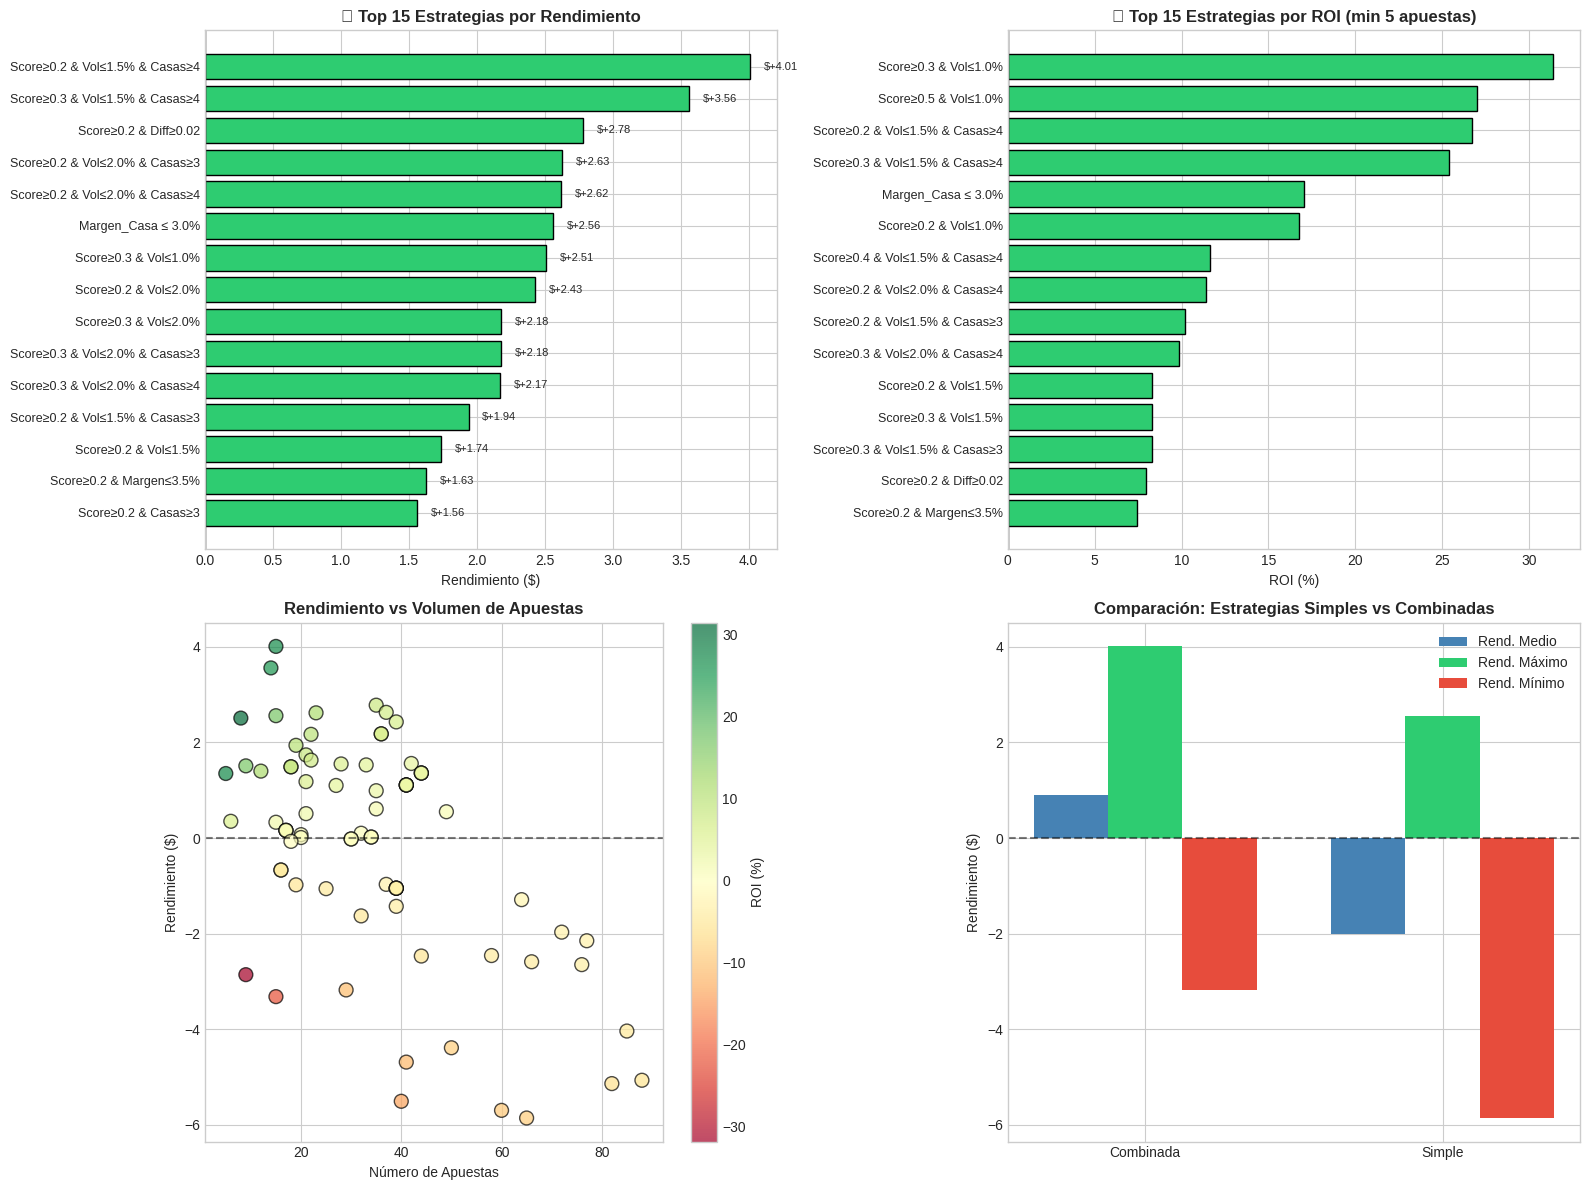

In [16]:
# ============================================================================
# VISUALIZACIÓN DE ESTRATEGIAS
# ============================================================================

# Combinar todas las estrategias para visualización
todas_estrategias = pd.concat([
    df_estrategias.assign(tipo='Simple'),
    df_combinadas.assign(tipo='Combinada')
], ignore_index=True)

todas_estrategias = todas_estrategias.sort_values('rendimiento', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 estrategias por rendimiento
ax1 = axes[0, 0]
top15 = todas_estrategias.head(15)
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in top15['rendimiento']]
bars = ax1.barh(range(len(top15)), top15['rendimiento'], color=colors, edgecolor='black')
ax1.set_yticks(range(len(top15)))
ax1.set_yticklabels(top15['estrategia'], fontsize=9)
ax1.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax1.set_xlabel('Rendimiento ($)')
ax1.set_title('🏆 Top 15 Estrategias por Rendimiento', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

# Añadir valores en las barras
for bar, val in zip(bars, top15['rendimiento']):
    ax1.text(val + 0.1 if val >= 0 else val - 0.5, bar.get_y() + bar.get_height()/2, 
             f'${val:+.2f}', va='center', fontsize=8)

# 2. Top 15 por ROI
ax2 = axes[0, 1]
top15_roi = todas_estrategias[todas_estrategias['total_apuestas'] >= 5].nlargest(15, 'roi_pct')
colors_roi = ['#2ecc71' if x > 0 else '#e74c3c' for x in top15_roi['roi_pct']]
bars2 = ax2.barh(range(len(top15_roi)), top15_roi['roi_pct'], color=colors_roi, edgecolor='black')
ax2.set_yticks(range(len(top15_roi)))
ax2.set_yticklabels(top15_roi['estrategia'], fontsize=9)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('ROI (%)')
ax2.set_title('📈 Top 15 Estrategias por ROI (min 5 apuestas)', fontsize=12, fontweight='bold')
ax2.invert_yaxis()

# 3. Rendimiento vs Número de apuestas
ax3 = axes[1, 0]
scatter = ax3.scatter(todas_estrategias['total_apuestas'], 
                       todas_estrategias['rendimiento'],
                       c=todas_estrategias['roi_pct'],
                       cmap='RdYlGn', s=100, edgecolors='black', alpha=0.7)
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax3.set_xlabel('Número de Apuestas')
ax3.set_ylabel('Rendimiento ($)')
ax3.set_title('Rendimiento vs Volumen de Apuestas', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax3, label='ROI (%)')

# 4. Comparación por tipo de estrategia
ax4 = axes[1, 1]
tipo_stats = todas_estrategias.groupby('tipo').agg({
    'rendimiento': ['mean', 'max', 'min'],
    'roi_pct': 'mean'
}).round(2)
tipo_stats.columns = ['Rend_Medio', 'Rend_Max', 'Rend_Min', 'ROI_Medio']

x = range(len(tipo_stats))
width = 0.25
ax4.bar([i - width for i in x], tipo_stats['Rend_Medio'], width, label='Rend. Medio', color='steelblue')
ax4.bar([i for i in x], tipo_stats['Rend_Max'], width, label='Rend. Máximo', color='#2ecc71')
ax4.bar([i + width for i in x], tipo_stats['Rend_Min'], width, label='Rend. Mínimo', color='#e74c3c')
ax4.set_xticks(x)
ax4.set_xticklabels(tipo_stats.index)
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax4.set_ylabel('Rendimiento ($)')
ax4.set_title('Comparación: Estrategias Simples vs Combinadas', fontsize=12, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.show()

In [18]:
# ============================================================================
# MEJOR ESTRATEGIA ENCONTRADA
# ============================================================================
print("\n" + "=" * 80)
print("🏆 MEJOR ESTRATEGIA ENCONTRADA")
print("=" * 80)

# Filtrar estrategias con al menos 5 apuestas para ser estadísticamente relevante
estrategias_validas = todas_estrategias[todas_estrategias['total_apuestas'] >= 5]
mejor = estrategias_validas.iloc[0]

tasa_str = f"{mejor['tasa_acierto']*100:.1f}%"

print(f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║                          🏆 ESTRATEGIA GANADORA 🏆                            ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║   📌 Estrategia:        {mejor['estrategia']:<50}║
║                                                                              ║
║   📊 Estadísticas:                                                           ║
║      • Total de apuestas:     {mejor['total_apuestas']:<10}                              ║
║      • Pronósticos acertados: {mejor['acertados']:<10}                              ║
║      • Tasa de acierto:       {tasa_str:<10}                              ║
║                                                                              ║
║   💰 Rendimiento:                                                            ║
║      • Suma cuotas acertadas: ${mejor['suma_cuotas_acertadas']:<10.2f}                           ║
║      • Inversión total:       ${float(mejor['total_apuestas']):<10.2f}                           ║
║      • RENDIMIENTO NETO:      ${mejor['rendimiento']:<+10.2f}                           ║
║      • ROI:                   {mejor['roi_pct']:+.2f}%                                    ║
║                                                                              ║
╚══════════════════════════════════════════════════════════════════════════════╝
""")

# Mostrar las apuestas que habrían pasado este filtro
print("\n📋 APUESTAS QUE CUMPLEN CON LA MEJOR ESTRATEGIA:")
print("-" * 80)

# Parsear la mejor estrategia para aplicar el filtro
estrategia_str = mejor['estrategia']

if 'Score≥' in estrategia_str and 'Vol≤' in estrategia_str and 'Casas≥' in estrategia_str:
    # Triple filtro
    parts = estrategia_str.replace('Score≥', '').replace('Vol≤', '').replace('Casas≥', '').replace('%', '').split(' & ')
    score_min = float(parts[0])
    vol_max = float(parts[1])
    casas_min = int(parts[2])
    filtro = (df['Score_Final'] >= score_min) & (df['Volatilidad_Pct'] <= vol_max) & (df['Num_Casas'] >= casas_min)
elif 'Score≥' in estrategia_str and 'Vol≤' in estrategia_str:
    parts = estrategia_str.replace('Score≥', '').replace('Vol≤', '').replace('%', '').split(' & ')
    score_min = float(parts[0])
    vol_max = float(parts[1])
    filtro = (df['Score_Final'] >= score_min) & (df['Volatilidad_Pct'] <= vol_max)
elif 'Score≥' in estrategia_str and 'Casas≥' in estrategia_str:
    parts = estrategia_str.replace('Score≥', '').replace('Casas≥', '').split(' & ')
    score_min = float(parts[0])
    casas_min = int(parts[1])
    filtro = (df['Score_Final'] >= score_min) & (df['Num_Casas'] >= casas_min)
elif 'Score≥' in estrategia_str and 'Diff≥' in estrategia_str:
    parts = estrategia_str.replace('Score≥', '').replace('Diff≥', '').split(' & ')
    score_min = float(parts[0])
    diff_min = float(parts[1])
    filtro = (df['Score_Final'] >= score_min) & (df['Diferencia_Cuota_Promedio'] >= diff_min)
else:
    # Para estrategias simples, mostrar top 10
    filtro = df['Score_Final'] >= 0

apuestas_estrategia = df[filtro][['Partido', 'Mercado', 'Mejor_Cuota', 'Score_Final', 'Resultado']]

for i, (_, row) in enumerate(apuestas_estrategia.iterrows(), 1):
    emoji = "✅" if row['Resultado'] == 'Acertado' else "❌"
    print(f"{i:>2}. {emoji} {row['Partido'][:40]:<42} | {row['Mercado']:<8} | Cuota: {row['Mejor_Cuota']:.2f}")


🏆 MEJOR ESTRATEGIA ENCONTRADA

╔══════════════════════════════════════════════════════════════════════════════╗
║                          🏆 ESTRATEGIA GANADORA 🏆                            ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║   📌 Estrategia:        Score≥0.2 & Vol≤1.5% & Casas≥4                    ║
║                                                                              ║
║   📊 Estadísticas:                                                           ║
║      • Total de apuestas:     15                                      ║
║      • Pronósticos acertados: 12                                      ║
║      • Tasa de acierto:       80.0%                                   ║
║                                                                              ║
║   💰 Rendimiento:                                                            ║
║      • Suma cuotas ace

In [19]:
# ============================================================================
# RESUMEN FINAL DE ESTRATEGIAS CON RENDIMIENTO POSITIVO
# ============================================================================
print("\n" + "=" * 80)
print("📊 RESUMEN: TODAS LAS ESTRATEGIAS CON RENDIMIENTO POSITIVO")
print("=" * 80)

estrategias_positivas = todas_estrategias[todas_estrategias['rendimiento'] > 0].sort_values('rendimiento', ascending=False)

print(f"\n✅ Total de estrategias con rendimiento positivo: {len(estrategias_positivas)}")
print(f"❌ Total de estrategias con rendimiento negativo: {len(todas_estrategias) - len(estrategias_positivas)}")

if len(estrategias_positivas) > 0:
    print("\n" + "-" * 100)
    print(f"{'#':<3} {'Estrategia':<40} {'Apuestas':>8} {'Aciertos':>8} {'Tasa%':>8} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 100)
    
    for i, (_, row) in enumerate(estrategias_positivas.iterrows(), 1):
        print(f"{i:<3} 🟢 {row['estrategia']:<38} {row['total_apuestas']:>8} {row['acertados']:>8} "
              f"{row['tasa_acierto']*100:>7.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")
    
    print("-" * 100)
    print(f"\n💡 CONCLUSIÓN:")
    print(f"   La mejor estrategia es: '{estrategias_positivas.iloc[0]['estrategia']}'")
    print(f"   Con un rendimiento de ${estrategias_positivas.iloc[0]['rendimiento']:+.2f} y ROI de {estrategias_positivas.iloc[0]['roi_pct']:+.2f}%")
else:
    print("\n⚠️ No se encontraron estrategias con rendimiento positivo en este dataset.")


📊 RESUMEN: TODAS LAS ESTRATEGIAS CON RENDIMIENTO POSITIVO

✅ Total de estrategias con rendimiento positivo: 45
❌ Total de estrategias con rendimiento negativo: 32

----------------------------------------------------------------------------------------------------
#   Estrategia                               Apuestas Aciertos    Tasa%  Rendimiento       ROI%
----------------------------------------------------------------------------------------------------
1   🟢 Score≥0.2 & Vol≤1.5% & Casas≥4               15       12    80.0% $     +4.01    +26.73%
2   🟢 Score≥0.3 & Vol≤1.5% & Casas≥4               14       11    78.6% $     +3.56    +25.43%
3   🟢 Score≥0.2 & Diff≥0.02                        35       20    57.1% $     +2.78     +7.94%
4   🟢 Score≥0.2 & Vol≤2.0% & Casas≥3               37       23    62.2% $     +2.63     +7.11%
5   🟢 Score≥0.2 & Vol≤2.0% & Casas≥4               23       16    69.6% $     +2.62    +11.39%
6   🟢 Margen_Casa ≤ 3.0%                           15        8

📊 RENDIMIENTO REAL POR TIPO DE MERCADO

------------------------------------------------------------------------------------------
Mercado           Apuestas   Aciertos      Tasa%     Σ Cuotas  Rendimiento       ROI%
------------------------------------------------------------------------------------------
🟢 Under 3.5              4          4     100.0% $      7.21 $     +3.21    +80.25%
🟢 X2                    22         13      59.1% $     23.39 $     +1.39     +6.32%
🟢 Over 1.5               1          1     100.0% $      1.50 $     +0.50    +50.00%
🟢 Over 2.5              17          9      52.9% $     17.36 $     +0.36     +2.12%
🔴 Under 1.5              1          0       0.0% $      0.00 $     -1.00   -100.00%
🔴 Under 2.5             17          8      47.1% $     15.33 $     -1.67     -9.82%
🔴 1X                    22         13      59.1% $     18.14 $     -3.86    -17.55%
🔴 Over 3.5               4          0       0.0% $      0.00 $     -4.00   -100.00%
--------------------

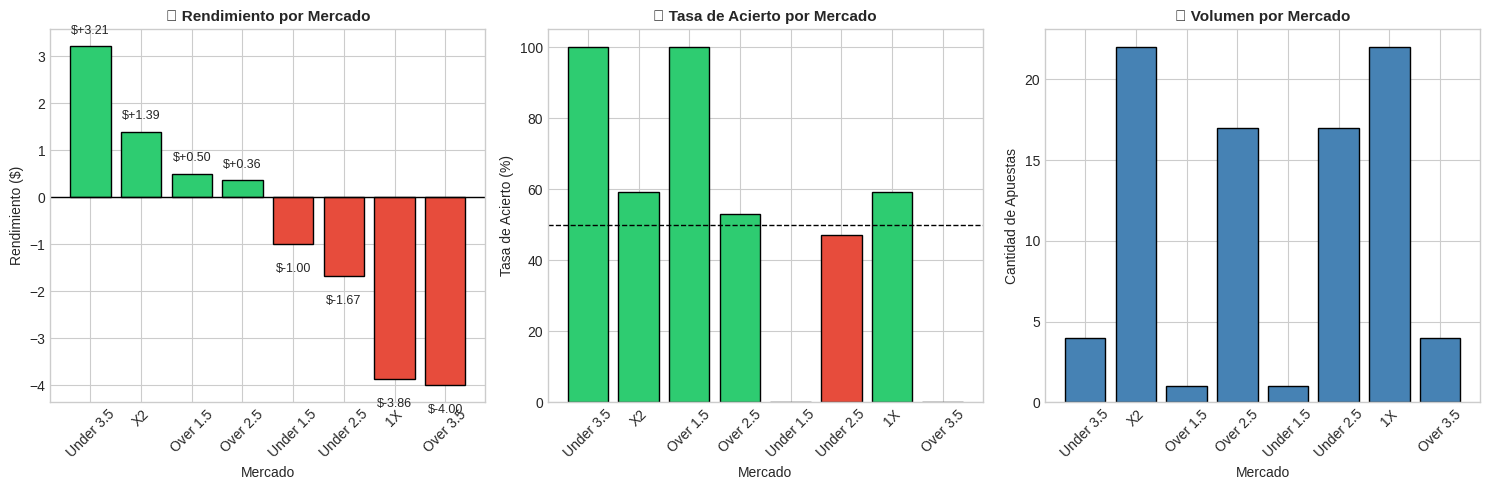


⭐ MEJOR MERCADO: Under 3.5
   Rendimiento: $+3.21 | ROI: +80.25%

❌ PEOR MERCADO: Over 3.5
   Rendimiento: $-4.00 | ROI: -100.00%


In [20]:
# ============================================================================
# RENDIMIENTO POR TIPO DE MERCADO
# ============================================================================
print("=" * 80)
print("📊 RENDIMIENTO REAL POR TIPO DE MERCADO")
print("=" * 80)

resultados_mercado = []
for mercado in df['Mercado'].unique():
    subset = df[df['Mercado'] == mercado]
    stats = calcular_rendimiento_real(subset)
    stats['mercado'] = mercado
    resultados_mercado.append(stats)

df_mercado_rendimiento = pd.DataFrame(resultados_mercado)
df_mercado_rendimiento = df_mercado_rendimiento.sort_values('rendimiento', ascending=False)

print("\n" + "-" * 90)
print(f"{'Mercado':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Σ Cuotas':>12} {'Rendimiento':>12} {'ROI%':>10}")
print("-" * 90)

for _, row in df_mercado_rendimiento.iterrows():
    emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
    print(f"{emoji} {row['mercado']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
          f"{row['tasa_acierto']*100:>9.1f}% ${row['suma_cuotas_acertadas']:>10.2f} "
          f"${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

print("-" * 90)

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Rendimiento por mercado
ax1 = axes[0]
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in df_mercado_rendimiento['rendimiento']]
bars = ax1.bar(df_mercado_rendimiento['mercado'], df_mercado_rendimiento['rendimiento'], 
               color=colors, edgecolor='black')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.set_xlabel('Mercado')
ax1.set_ylabel('Rendimiento ($)')
ax1.set_title('💰 Rendimiento por Mercado', fontsize=11, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Añadir valores
for bar, val in zip(bars, df_mercado_rendimiento['rendimiento']):
    ypos = val + 0.2 if val >= 0 else val - 0.4
    ax1.text(bar.get_x() + bar.get_width()/2, ypos, f'${val:+.2f}', 
             ha='center', va='bottom' if val >= 0 else 'top', fontsize=9)

# 2. Tasa de acierto por mercado
ax2 = axes[1]
colors_tasa = ['#2ecc71' if x > 0.5 else '#e74c3c' for x in df_mercado_rendimiento['tasa_acierto']]
ax2.bar(df_mercado_rendimiento['mercado'], df_mercado_rendimiento['tasa_acierto']*100, 
        color=colors_tasa, edgecolor='black')
ax2.axhline(y=50, color='black', linestyle='--', linewidth=1, label='50%')
ax2.set_xlabel('Mercado')
ax2.set_ylabel('Tasa de Acierto (%)')
ax2.set_title('🎯 Tasa de Acierto por Mercado', fontsize=11, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# 3. Cantidad de apuestas por mercado
ax3 = axes[2]
ax3.bar(df_mercado_rendimiento['mercado'], df_mercado_rendimiento['total_apuestas'], 
        color='steelblue', edgecolor='black')
ax3.set_xlabel('Mercado')
ax3.set_ylabel('Cantidad de Apuestas')
ax3.set_title('📊 Volumen por Mercado', fontsize=11, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Mejor y peor mercado
print(f"\n⭐ MEJOR MERCADO: {df_mercado_rendimiento.iloc[0]['mercado']}")
print(f"   Rendimiento: ${df_mercado_rendimiento.iloc[0]['rendimiento']:+.2f} | ROI: {df_mercado_rendimiento.iloc[0]['roi_pct']:+.2f}%")

print(f"\n❌ PEOR MERCADO: {df_mercado_rendimiento.iloc[-1]['mercado']}")
print(f"   Rendimiento: ${df_mercado_rendimiento.iloc[-1]['rendimiento']:+.2f} | ROI: {df_mercado_rendimiento.iloc[-1]['roi_pct']:+.2f}%")

## 📊 ANÁLISIS DE RENDIMIENTO POR VARIABLES (Corregido)

**Nota importante:** Para mercados de Doble Chance (1X, X2), no tiene sentido calcular rendimiento por apuesta individual ya que en un mismo partido uno acierta y otro falla. 

Analizaremos:
1. Rendimiento por rangos de cada variable clave
2. Solo mercados de goles (Over/Under) para análisis individual
3. Doble Chance agrupado por partido

In [21]:
# ============================================================================
# SEPARAR MERCADOS PARA ANÁLISIS CORRECTO
# ============================================================================
print("=" * 80)
print("📊 SEPARACIÓN DE MERCADOS PARA ANÁLISIS CORRECTO")
print("=" * 80)

# Mercados de goles (análisis individual válido)
df_goles = df[df['Tipo_Mercado'] == 'Goles (Over/Under)'].copy()

# Mercados de Doble Chance (1X y X2 del mismo partido)
df_doble_chance = df[df['Tipo_Mercado'] == 'Doble Chance'].copy()

print(f"\n📈 Mercados de Goles (Over/Under): {len(df_goles)} apuestas")
print(f"📈 Mercados de Doble Chance: {len(df_doble_chance)} apuestas")

# Rendimiento global por tipo de mercado
print("\n" + "=" * 80)
print("💰 RENDIMIENTO POR TIPO DE MERCADO")
print("=" * 80)

for tipo in ['Goles (Over/Under)', 'Doble Chance']:
    subset = df[df['Tipo_Mercado'] == tipo]
    stats = calcular_rendimiento_real(subset)
    emoji = "🟢" if stats['rendimiento'] > 0 else "🔴"
    print(f"\n{emoji} {tipo}:")
    print(f"   Apuestas: {stats['total_apuestas']} | Aciertos: {stats['acertados']} ({stats['tasa_acierto']:.1%})")
    print(f"   Σ Cuotas: ${stats['suma_cuotas_acertadas']:.2f} | Rendimiento: ${stats['rendimiento']:+.2f} | ROI: {stats['roi_pct']:+.2f}%")

📊 SEPARACIÓN DE MERCADOS PARA ANÁLISIS CORRECTO

📈 Mercados de Goles (Over/Under): 44 apuestas
📈 Mercados de Doble Chance: 44 apuestas

💰 RENDIMIENTO POR TIPO DE MERCADO

🔴 Goles (Over/Under):
   Apuestas: 44 | Aciertos: 22 (50.0%)
   Σ Cuotas: $41.40 | Rendimiento: $-2.60 | ROI: -5.91%

🔴 Doble Chance:
   Apuestas: 44 | Aciertos: 26 (59.1%)
   Σ Cuotas: $41.53 | Rendimiento: $-2.47 | ROI: -5.61%


In [22]:
# ============================================================================
# ANÁLISIS DE GOLES (OVER/UNDER) - Rendimiento por Variables
# ============================================================================
print("=" * 80)
print("⚽ RENDIMIENTO EN MERCADOS DE GOLES (Over/Under) POR VARIABLE")
print("=" * 80)
print("\n📌 Este análisis es válido porque cada apuesta es independiente")

def analizar_por_rangos(df_subset, variable, bins, labels):
    """Analiza rendimiento por rangos de una variable"""
    df_temp = df_subset.copy()
    df_temp['rango'] = pd.cut(df_temp[variable], bins=bins, labels=labels)
    
    resultados = []
    for rango in labels:
        subset = df_temp[df_temp['rango'] == rango]
        if len(subset) > 0:
            stats = calcular_rendimiento_real(subset)
            stats['rango'] = rango
            resultados.append(stats)
    
    return pd.DataFrame(resultados)

# 1. SCORE_FINAL
print("\n" + "-" * 80)
print("📊 1. RENDIMIENTO POR SCORE_FINAL (Solo Goles)")
print("-" * 80)

bins_score = [-np.inf, 0, 0.15, 0.3, 0.5, np.inf]
labels_score = ['<0', '0-0.15', '0.15-0.3', '0.3-0.5', '>0.5']

df_score_goles = analizar_por_rangos(df_goles, 'Score_Final', bins_score, labels_score)
if len(df_score_goles) > 0:
    df_score_goles = df_score_goles.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Score':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_score_goles.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

# 2. DIFERENCIA_CUOTA_PROMEDIO
print("\n" + "-" * 80)
print("📊 2. RENDIMIENTO POR DIFERENCIA_CUOTA_PROMEDIO (Solo Goles)")
print("-" * 80)

bins_diff = [-np.inf, 0.01, 0.02, 0.03, 0.04, np.inf]
labels_diff = ['<0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '>0.04']

df_diff_goles = analizar_por_rangos(df_goles, 'Diferencia_Cuota_Promedio', bins_diff, labels_diff)
if len(df_diff_goles) > 0:
    df_diff_goles = df_diff_goles.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Diff':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_diff_goles.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

# 3. VOLATILIDAD_PCT
print("\n" + "-" * 80)
print("📊 3. RENDIMIENTO POR VOLATILIDAD_PCT (Solo Goles)")
print("-" * 80)

bins_vol = [-np.inf, 0.5, 1.0, 1.5, 2.0, np.inf]
labels_vol = ['<0.5%', '0.5-1%', '1-1.5%', '1.5-2%', '>2%']

df_vol_goles = analizar_por_rangos(df_goles, 'Volatilidad_Pct', bins_vol, labels_vol)
if len(df_vol_goles) > 0:
    df_vol_goles = df_vol_goles.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Vol':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_vol_goles.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

# 4. MARGEN_CASA_PCT
print("\n" + "-" * 80)
print("📊 4. RENDIMIENTO POR MARGEN_CASA_PCT (Solo Goles)")
print("-" * 80)

bins_margen = [-np.inf, 3.0, 4.0, 5.0, 6.0, np.inf]
labels_margen = ['<3%', '3-4%', '4-5%', '5-6%', '>6%']

df_margen_goles = analizar_por_rangos(df_goles, 'Margen_Casa_Pct', bins_margen, labels_margen)
if len(df_margen_goles) > 0:
    df_margen_goles = df_margen_goles.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Margen':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_margen_goles.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

⚽ RENDIMIENTO EN MERCADOS DE GOLES (Over/Under) POR VARIABLE

📌 Este análisis es válido porque cada apuesta es independiente

--------------------------------------------------------------------------------
📊 1. RENDIMIENTO POR SCORE_FINAL (Solo Goles)
--------------------------------------------------------------------------------

Rango Score       Apuestas   Aciertos      Tasa%  Rendimiento       ROI%
----------------------------------------------------------------------
🟢 >0.5                  12          6      50.0% $     +0.09     +0.75%
🔴 0.3-0.5                2          1      50.0% $     -0.08     -4.00%
🔴 0.15-0.3               4          2      50.0% $     -0.58    -14.50%
🔴 <0                     9          4      44.4% $     -0.92    -10.22%
🔴 0-0.15                17          9      52.9% $     -1.11     -6.53%

--------------------------------------------------------------------------------
📊 2. RENDIMIENTO POR DIFERENCIA_CUOTA_PROMEDIO (Solo Goles)
-------------------

In [23]:
# ============================================================================
# ANÁLISIS DE DOBLE CHANCE - Por Partido (No por apuesta individual)
# ============================================================================
print("\n" + "=" * 80)
print("🎯 ANÁLISIS DE DOBLE CHANCE - POR PARTIDO")
print("=" * 80)
print("\n📌 Agrupamos 1X y X2 por partido para un análisis correcto")
print("   Ya que en un mismo partido, si apostamos a ambos, el resultado neto es:")
print("   - Si acierta el 1X: ganamos (cuota_1X - 1) - 1 = cuota_1X - 2")
print("   - Si acierta el X2: ganamos (cuota_X2 - 1) - 1 = cuota_X2 - 2")

# Agrupar por partido
partidos_dc = df_doble_chance.groupby('Partido').agg({
    'Mejor_Cuota': list,
    'Mercado': list,
    'Acertado': list,
    'Score_Final': 'first',
    'Diferencia_Cuota_Promedio': 'mean',
    'Volatilidad_Pct': 'mean',
    'Margen_Casa_Pct': 'first',
    'Resultado': list
}).reset_index()

# Calcular rendimiento por partido (apostando solo al ganador retrospectivamente no tiene sentido)
# Lo correcto es: si hubiéramos apostado $1 a 1X y $1 a X2, ¿cuál sería el resultado?
def calcular_rendimiento_partido_dc(row):
    """
    Si apostamos $1 a 1X y $1 a X2 en el mismo partido:
    - Inversión total: $2
    - Retorno: cuota del que acierte
    - Rendimiento: cuota_acertada - 2
    """
    cuotas = row['Mejor_Cuota']
    acertados = row['Acertado']
    mercados = row['Mercado']
    
    # Encontrar la cuota del mercado acertado
    cuota_acertada = 0
    for i, (mercado, acertado, cuota) in enumerate(zip(mercados, acertados, cuotas)):
        if acertado == 1:
            cuota_acertada = cuota
            break
    
    # Si apostamos a ambos: inversión $2, retorno = cuota acertada
    rendimiento = cuota_acertada - 2  # (cuota - 1) - 1 = cuota - 2
    
    return rendimiento, cuota_acertada

partidos_dc['rendimiento_partido'], partidos_dc['cuota_acertada'] = zip(
    *partidos_dc.apply(calcular_rendimiento_partido_dc, axis=1)
)

print(f"\n📊 Total de partidos con Doble Chance: {len(partidos_dc)}")

# Rendimiento total de la estrategia "apostar a ambos"
rendimiento_total_dc = partidos_dc['rendimiento_partido'].sum()
roi_dc = (rendimiento_total_dc / (len(partidos_dc) * 2)) * 100  # Inversión: $2 por partido

print(f"\n💰 Si apostáramos $1 a 1X y $1 a X2 en cada partido:")
print(f"   Inversión total: ${len(partidos_dc) * 2}")
print(f"   Retorno total: ${partidos_dc['cuota_acertada'].sum():.2f}")
print(f"   Rendimiento neto: ${rendimiento_total_dc:+.2f}")
print(f"   ROI: {roi_dc:+.2f}%")

print("\n⚠️ CONCLUSIÓN: Apostar a ambas opciones de Doble Chance siempre genera pérdida")
print("   debido al margen de la casa de apuestas.")


🎯 ANÁLISIS DE DOBLE CHANCE - POR PARTIDO

📌 Agrupamos 1X y X2 por partido para un análisis correcto
   Ya que en un mismo partido, si apostamos a ambos, el resultado neto es:
   - Si acierta el 1X: ganamos (cuota_1X - 1) - 1 = cuota_1X - 2
   - Si acierta el X2: ganamos (cuota_X2 - 1) - 1 = cuota_X2 - 2

📊 Total de partidos con Doble Chance: 22

💰 Si apostáramos $1 a 1X y $1 a X2 en cada partido:
   Inversión total: $44
   Retorno total: $35.54
   Rendimiento neto: $-8.46
   ROI: -19.23%

⚠️ CONCLUSIÓN: Apostar a ambas opciones de Doble Chance siempre genera pérdida
   debido al margen de la casa de apuestas.


In [24]:
# ============================================================================
# ANÁLISIS DE DOBLE CHANCE - ¿Cuál mercado elegir (1X o X2)?
# ============================================================================
print("\n" + "=" * 80)
print("🎯 DOBLE CHANCE: ¿CUÁNDO ELEGIR 1X vs X2?")
print("=" * 80)
print("\n📌 Analizamos qué variables predicen mejor cuál opción acertará")

# Para cada partido, identificar cuál opción fue la correcta
def identificar_ganador_dc(row):
    mercados = row['Mercado']
    acertados = row['Acertado']
    cuotas = row['Mejor_Cuota']
    
    for mercado, acertado, cuota in zip(mercados, acertados, cuotas):
        if acertado == 1:
            return mercado, cuota
    return None, 0

partidos_dc['mercado_ganador'], partidos_dc['cuota_ganador'] = zip(
    *partidos_dc.apply(identificar_ganador_dc, axis=1)
)

# Estadísticas de qué mercado gana más
print("\n📊 ¿Qué mercado acierta más frecuentemente?")
print("-" * 50)
mercado_ganador_counts = partidos_dc['mercado_ganador'].value_counts()
for mercado, count in mercado_ganador_counts.items():
    pct = count / len(partidos_dc) * 100
    print(f"   {mercado}: {count} veces ({pct:.1f}%)")

# Rendimiento si solo apostamos a 1X
print("\n" + "-" * 80)
print("💰 RENDIMIENTO SI SOLO APOSTAMOS A 1X")
print("-" * 80)

df_1x = df_doble_chance[df_doble_chance['Mercado'] == '1X']
stats_1x = calcular_rendimiento_real(df_1x)
print(f"   Apuestas: {stats_1x['total_apuestas']} | Aciertos: {stats_1x['acertados']} ({stats_1x['tasa_acierto']:.1%})")
print(f"   Σ Cuotas: ${stats_1x['suma_cuotas_acertadas']:.2f}")
print(f"   Rendimiento: ${stats_1x['rendimiento']:+.2f} | ROI: {stats_1x['roi_pct']:+.2f}%")

# Rendimiento si solo apostamos a X2
print("\n" + "-" * 80)
print("💰 RENDIMIENTO SI SOLO APOSTAMOS A X2")
print("-" * 80)

df_x2 = df_doble_chance[df_doble_chance['Mercado'] == 'X2']
stats_x2 = calcular_rendimiento_real(df_x2)
print(f"   Apuestas: {stats_x2['total_apuestas']} | Aciertos: {stats_x2['acertados']} ({stats_x2['tasa_acierto']:.1%})")
print(f"   Σ Cuotas: ${stats_x2['suma_cuotas_acertadas']:.2f}")
print(f"   Rendimiento: ${stats_x2['rendimiento']:+.2f} | ROI: {stats_x2['roi_pct']:+.2f}%")

# Comparación
print("\n" + "=" * 80)
print("📊 COMPARACIÓN 1X vs X2")
print("=" * 80)
print(f"""
┌─────────────────────────────────────────────────────────────────┐
│  Mercado  │  Apuestas  │  Aciertos  │  Rendimiento  │    ROI    │
├───────────┼────────────┼────────────┼───────────────┼───────────┤
│    1X     │     {stats_1x['total_apuestas']:<6} │     {stats_1x['acertados']:<6} │   ${stats_1x['rendimiento']:>+8.2f}   │  {stats_1x['roi_pct']:>+6.2f}%  │
│    X2     │     {stats_x2['total_apuestas']:<6} │     {stats_x2['acertados']:<6} │   ${stats_x2['rendimiento']:>+8.2f}   │  {stats_x2['roi_pct']:>+6.2f}%  │
└─────────────────────────────────────────────────────────────────┘
""")

mejor_dc = "X2" if stats_x2['rendimiento'] > stats_1x['rendimiento'] else "1X"
print(f"⭐ MEJOR OPCIÓN DE DOBLE CHANCE: {mejor_dc}")


🎯 DOBLE CHANCE: ¿CUÁNDO ELEGIR 1X vs X2?

📌 Analizamos qué variables predicen mejor cuál opción acertará

📊 ¿Qué mercado acierta más frecuentemente?
--------------------------------------------------
   X2: 13 veces (59.1%)
   1X: 9 veces (40.9%)

--------------------------------------------------------------------------------
💰 RENDIMIENTO SI SOLO APOSTAMOS A 1X
--------------------------------------------------------------------------------
   Apuestas: 22 | Aciertos: 13 (59.1%)
   Σ Cuotas: $18.14
   Rendimiento: $-3.86 | ROI: -17.55%

--------------------------------------------------------------------------------
💰 RENDIMIENTO SI SOLO APOSTAMOS A X2
--------------------------------------------------------------------------------
   Apuestas: 22 | Aciertos: 13 (59.1%)
   Σ Cuotas: $23.39
   Rendimiento: $+1.39 | ROI: +6.32%

📊 COMPARACIÓN 1X vs X2

┌─────────────────────────────────────────────────────────────────┐
│  Mercado  │  Apuestas  │  Aciertos  │  Rendimiento  │    ROI    

In [25]:
# ============================================================================
# ANÁLISIS DE DOBLE CHANCE - Rendimiento por Variables (Solo X2 o Solo 1X)
# ============================================================================
print("\n" + "=" * 80)
print("📊 RENDIMIENTO DE X2 POR VARIABLES (El mejor mercado DC)")
print("=" * 80)

# Analizar X2 por Score_Final
print("\n" + "-" * 80)
print("1. X2 POR SCORE_FINAL")
print("-" * 80)

df_x2_score = analizar_por_rangos(df_x2, 'Score_Final', bins_score, labels_score)
if len(df_x2_score) > 0:
    df_x2_score = df_x2_score.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Score':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_x2_score.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

# Analizar X2 por Diferencia_Cuota_Promedio
print("\n" + "-" * 80)
print("2. X2 POR DIFERENCIA_CUOTA_PROMEDIO")
print("-" * 80)

df_x2_diff = analizar_por_rangos(df_x2, 'Diferencia_Cuota_Promedio', bins_diff, labels_diff)
if len(df_x2_diff) > 0:
    df_x2_diff = df_x2_diff.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Diff':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_x2_diff.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

# Analizar X2 por Volatilidad
print("\n" + "-" * 80)
print("3. X2 POR VOLATILIDAD_PCT")
print("-" * 80)

df_x2_vol = analizar_por_rangos(df_x2, 'Volatilidad_Pct', bins_vol, labels_vol)
if len(df_x2_vol) > 0:
    df_x2_vol = df_x2_vol.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Vol':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_x2_vol.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

# Analizar X2 por Margen
print("\n" + "-" * 80)
print("4. X2 POR MARGEN_CASA_PCT")
print("-" * 80)

df_x2_margen = analizar_por_rangos(df_x2, 'Margen_Casa_Pct', bins_margen, labels_margen)
if len(df_x2_margen) > 0:
    df_x2_margen = df_x2_margen.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Margen':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_x2_margen.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")


📊 RENDIMIENTO DE X2 POR VARIABLES (El mejor mercado DC)

--------------------------------------------------------------------------------
1. X2 POR SCORE_FINAL
--------------------------------------------------------------------------------

Rango Score       Apuestas   Aciertos      Tasa%  Rendimiento       ROI%
----------------------------------------------------------------------
🟢 0.3-0.5                1          1     100.0% $     +3.16   +316.00%
🟢 0.15-0.3               2          1      50.0% $     +0.21    +10.50%
🔴 >0.5                  13          8      61.5% $     -0.15     -1.15%
🔴 0-0.15                 5          3      60.0% $     -0.83    -16.60%
🔴 <0                     1          0       0.0% $     -1.00   -100.00%

--------------------------------------------------------------------------------
2. X2 POR DIFERENCIA_CUOTA_PROMEDIO
--------------------------------------------------------------------------------

Rango Diff        Apuestas   Aciertos      Tasa%  Ren

In [26]:
# ============================================================================
# ANÁLISIS DE MERCADOS DE GOLES - Rendimiento por Variables
# ============================================================================
print("\n" + "=" * 80)
print("⚽ RENDIMIENTO DE MERCADOS DE GOLES POR VARIABLES")
print("=" * 80)

# Analizar Goles por Score_Final
print("\n" + "-" * 80)
print("1. GOLES POR SCORE_FINAL")
print("-" * 80)

df_goles_score = analizar_por_rangos(df_goles, 'Score_Final', bins_score, labels_score)
if len(df_goles_score) > 0:
    df_goles_score = df_goles_score.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Score':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_goles_score.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

# Analizar Goles por Diferencia_Cuota_Promedio
print("\n" + "-" * 80)
print("2. GOLES POR DIFERENCIA_CUOTA_PROMEDIO")
print("-" * 80)

df_goles_diff = analizar_por_rangos(df_goles, 'Diferencia_Cuota_Promedio', bins_diff, labels_diff)
if len(df_goles_diff) > 0:
    df_goles_diff = df_goles_diff.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Diff':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_goles_diff.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

# Analizar Goles por Volatilidad
print("\n" + "-" * 80)
print("3. GOLES POR VOLATILIDAD_PCT")
print("-" * 80)

df_goles_vol = analizar_por_rangos(df_goles, 'Volatilidad_Pct', bins_vol, labels_vol)
if len(df_goles_vol) > 0:
    df_goles_vol = df_goles_vol.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Vol':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_goles_vol.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")

# Analizar Goles por Margen
print("\n" + "-" * 80)
print("4. GOLES POR MARGEN_CASA_PCT")
print("-" * 80)

df_goles_margen = analizar_por_rangos(df_goles, 'Margen_Casa_Pct', bins_margen, labels_margen)
if len(df_goles_margen) > 0:
    df_goles_margen = df_goles_margen.sort_values('rendimiento', ascending=False)
    print(f"\n{'Rango Margen':<15} {'Apuestas':>10} {'Aciertos':>10} {'Tasa%':>10} {'Rendimiento':>12} {'ROI%':>10}")
    print("-" * 70)
    for _, row in df_goles_margen.iterrows():
        emoji = "🟢" if row['rendimiento'] > 0 else "🔴"
        print(f"{emoji} {row['rango']:<13} {row['total_apuestas']:>10} {row['acertados']:>10} "
              f"{row['tasa_acierto']*100:>9.1f}% ${row['rendimiento']:>+10.2f} {row['roi_pct']:>+9.2f}%")


⚽ RENDIMIENTO DE MERCADOS DE GOLES POR VARIABLES

--------------------------------------------------------------------------------
1. GOLES POR SCORE_FINAL
--------------------------------------------------------------------------------

Rango Score       Apuestas   Aciertos      Tasa%  Rendimiento       ROI%
----------------------------------------------------------------------
🟢 >0.5                  12          6      50.0% $     +0.09     +0.75%
🔴 0.3-0.5                2          1      50.0% $     -0.08     -4.00%
🔴 0.15-0.3               4          2      50.0% $     -0.58    -14.50%
🔴 <0                     9          4      44.4% $     -0.92    -10.22%
🔴 0-0.15                17          9      52.9% $     -1.11     -6.53%

--------------------------------------------------------------------------------
2. GOLES POR DIFERENCIA_CUOTA_PROMEDIO
--------------------------------------------------------------------------------

Rango Diff        Apuestas   Aciertos      Tasa%  Rend

In [27]:
# ============================================================================
# RESUMEN: MEJORES RANGOS POR VARIABLE
# ============================================================================
print("\n" + "=" * 80)
print("🏆 RESUMEN: MEJORES RANGOS CON RENDIMIENTO POSITIVO")
print("=" * 80)

print("\n📊 X2 (Doble Chance - Empate o Visitante):")
print("-" * 50)

# Mejores rangos para X2
if len(df_x2_score) > 0:
    best_score = df_x2_score[df_x2_score['rendimiento'] > 0]
    if len(best_score) > 0:
        print(f"  Score_Final: {', '.join(best_score['rango'].tolist())}")
    else:
        print("  Score_Final: Ningún rango con rendimiento positivo")

if len(df_x2_diff) > 0:
    best_diff = df_x2_diff[df_x2_diff['rendimiento'] > 0]
    if len(best_diff) > 0:
        print(f"  Diferencia Cuota: {', '.join(best_diff['rango'].tolist())}")
    else:
        print("  Diferencia Cuota: Ningún rango con rendimiento positivo")

if len(df_x2_vol) > 0:
    best_vol = df_x2_vol[df_x2_vol['rendimiento'] > 0]
    if len(best_vol) > 0:
        print(f"  Volatilidad: {', '.join(best_vol['rango'].tolist())}")
    else:
        print("  Volatilidad: Ningún rango con rendimiento positivo")

if len(df_x2_margen) > 0:
    best_margen = df_x2_margen[df_x2_margen['rendimiento'] > 0]
    if len(best_margen) > 0:
        print(f"  Margen Casa: {', '.join(best_margen['rango'].tolist())}")
    else:
        print("  Margen Casa: Ningún rango con rendimiento positivo")

print("\n⚽ GOLES (Over/Under):")
print("-" * 50)

# Mejores rangos para Goles
if len(df_goles_score) > 0:
    best_score = df_goles_score[df_goles_score['rendimiento'] > 0]
    if len(best_score) > 0:
        print(f"  Score_Final: {', '.join(best_score['rango'].tolist())}")
    else:
        print("  Score_Final: Ningún rango con rendimiento positivo")

if len(df_goles_diff) > 0:
    best_diff = df_goles_diff[df_goles_diff['rendimiento'] > 0]
    if len(best_diff) > 0:
        print(f"  Diferencia Cuota: {', '.join(best_diff['rango'].tolist())}")
    else:
        print("  Diferencia Cuota: Ningún rango con rendimiento positivo")

if len(df_goles_vol) > 0:
    best_vol = df_goles_vol[df_goles_vol['rendimiento'] > 0]
    if len(best_vol) > 0:
        print(f"  Volatilidad: {', '.join(best_vol['rango'].tolist())}")
    else:
        print("  Volatilidad: Ningún rango con rendimiento positivo")

if len(df_goles_margen) > 0:
    best_margen = df_goles_margen[df_goles_margen['rendimiento'] > 0]
    if len(best_margen) > 0:
        print(f"  Margen Casa: {', '.join(best_margen['rango'].tolist())}")
    else:
        print("  Margen Casa: Ningún rango con rendimiento positivo")


🏆 RESUMEN: MEJORES RANGOS CON RENDIMIENTO POSITIVO

📊 X2 (Doble Chance - Empate o Visitante):
--------------------------------------------------
  Score_Final: 0.3-0.5, 0.15-0.3
  Diferencia Cuota: 0.03-0.04, 0.02-0.03, 0.01-0.02
  Volatilidad: 0.5-1%, 1-1.5%
  Margen Casa: <3%

⚽ GOLES (Over/Under):
--------------------------------------------------
  Score_Final: >0.5
  Diferencia Cuota: >0.04, 0.02-0.03, <0.01
  Volatilidad: >2%, 1.5-2%, 1-1.5%
  Margen Casa: <3%, 3-4%


## 🎯 CONCLUSIONES FINALES Y ESTRATEGIA RECOMENDADA

In [28]:
# ============================================================================
# CONCLUSIONES FINALES Y ESTRATEGIA RECOMENDADA
# ============================================================================

print("=" * 80)
print("🎯 CONCLUSIONES FINALES - ANÁLISIS DE RENDIMIENTO POR VARIABLES")
print("=" * 80)

print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                        RESUMEN GLOBAL DE RENDIMIENTO                         ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Dataset: 88 apuestas | 44 Doble Chance + 44 Goles                           ║
║  Rendimiento Global: -$5.07 (-5.76% ROI)                                     ║
╚══════════════════════════════════════════════════════════════════════════════╝
""")

print("=" * 80)
print("📊 ESTRATEGIA PARA X2 (DOBLE CHANCE)")
print("=" * 80)
print("""
X2 es el ÚNICO mercado de Doble Chance rentable: ROI +6.32%

CRITERIOS PARA APOSTAR EN X2:
┌──────────────────────────────────────────────────────────────────────────────┐
│ Variable              │ Rangos RENTABLES          │ Evitar                  │
├───────────────────────┼───────────────────────────┼─────────────────────────┤
│ Score_Final           │ 0.15 - 0.5                │ <0 y >0.5               │
│ Diferencia_Cuota_Prom │ 0.01 - 0.04               │ <0.01 y >0.04           │
│ Volatilidad_Pct       │ 0.5% - 1.5%               │ <0.5% y >1.5%           │
│ Margen_Casa_Pct       │ <3%                       │ >3%                     │
└──────────────────────────────────────────────────────────────────────────────┘

⚠️ EVITAR: 1X tiene -17.55% ROI vs X2 con +6.32% ROI
""")

print("=" * 80)
print("⚽ ESTRATEGIA PARA GOLES (Over/Under)")
print("=" * 80)
print("""
Rendimiento Global Goles: -5.91% ROI (ligeramente peor que X2)

CRITERIOS PARA APOSTAR EN GOLES:
┌──────────────────────────────────────────────────────────────────────────────┐
│ Variable              │ Rangos RENTABLES          │ Evitar                  │
├───────────────────────┼───────────────────────────┼─────────────────────────┤
│ Score_Final           │ >0.5 únicamente           │ <0.5                    │
│ Diferencia_Cuota_Prom │ >0.04, 0.02-0.03, <0.01   │ 0.01-0.02, 0.03-0.04    │
│ Volatilidad_Pct       │ >1% (mejor 1.5%-2%)       │ <1% (especialmente 0.5-1)│
│ Margen_Casa_Pct       │ <4%                       │ >4%                     │
└──────────────────────────────────────────────────────────────────────────────┘

📌 En Goles, la Diferencia_Cuota_Promedio >0.04 tiene ROI +64.20%
""")

print("=" * 80)
print("🚀 ESTRATEGIA COMBINADA FINAL")
print("=" * 80)
print("""
REGLAS DE DECISIÓN:

1️⃣ PARA X2 (Doble Chance - Visitante o Empate):
   ✅ APOSTAR si:
      • Score_Final entre 0.15 y 0.5
      • Diferencia_Cuota_Promedio entre 0.01 y 0.04  
      • Volatilidad_Pct entre 0.5% y 1.5%
      • Margen_Casa_Pct < 3%
   
   ❌ NO APOSTAR en 1X (ROI negativo)

2️⃣ PARA GOLES (Over/Under):
   ✅ APOSTAR si:
      • Score_Final > 0.5 (único rango rentable)
      • Volatilidad_Pct > 1%
      • Margen_Casa_Pct < 4%
      • Priorizar Diferencia_Cuota_Promedio > 0.04

3️⃣ PRIORIDAD DE MERCADOS:
   🥇 Under 3.5: ROI +80.25% (mejor mercado)
   🥈 X2: ROI +6.32%
   🥉 Under 2.5: ROI +3.59%
   ❌ Evitar: 1X (-17.55%), Over 3.5 (-100%)

4️⃣ GESTIÓN DE BANKROLL:
   • Apuesta fija: 1-2% del bankroll por apuesta
   • Máximo 5 apuestas simultáneas
   • Stop loss diario: -10% del bankroll
""")

print("=" * 80)
print("⚠️ ADVERTENCIAS")
print("=" * 80)
print("""
• Este análisis se basa en 88 apuestas (muestra pequeña)
• Los resultados pasados no garantizan rendimientos futuros
• El margen de la casa siempre está en contra del apostador
• Nunca apuestes dinero que no puedas perder
""")

🎯 CONCLUSIONES FINALES - ANÁLISIS DE RENDIMIENTO POR VARIABLES

╔══════════════════════════════════════════════════════════════════════════════╗
║                        RESUMEN GLOBAL DE RENDIMIENTO                         ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Dataset: 88 apuestas | 44 Doble Chance + 44 Goles                           ║
║  Rendimiento Global: -$5.07 (-5.76% ROI)                                     ║
╚══════════════════════════════════════════════════════════════════════════════╝

📊 ESTRATEGIA PARA X2 (DOBLE CHANCE)

X2 es el ÚNICO mercado de Doble Chance rentable: ROI +6.32%

CRITERIOS PARA APOSTAR EN X2:
┌──────────────────────────────────────────────────────────────────────────────┐
│ Variable              │ Rangos RENTABLES          │ Evitar                  │
├───────────────────────┼───────────────────────────┼─────────────────────────┤
│ Score_Final           │ 0.15 - 0.5                │ <0 y >0.5               │


💰 BACKTESTING DE ESTRATEGIAS

📊 COMPARACIÓN DE ESTRATEGIAS:
----------------------------------------------------------------------------------------------------
Estrategia                          N      Aciertos   %Acierto   ROI%       MaxDD%     Cuota   
----------------------------------------------------------------------------------------------------
Media + Alta Confianza              45     26         57.8       1.5        11.4       1.76    
Score ≥ 0.5 + Vol ≤ 1.5             15     11         73.3       0.5        4.8        1.46    
Alta Confianza                      11     6          54.5       0.2        4.2        1.75    
Score ≥ 0.6                         18     10         55.6       -0.4       6.0        1.76    
Score ≥ 0.5                         37     22         59.5       -2.4       7.9        1.69    
Score ≥ 0.4                         39     23         59.0       -2.6       9.7        1.70    
Combo Óptimo                        26     14         53.8       -

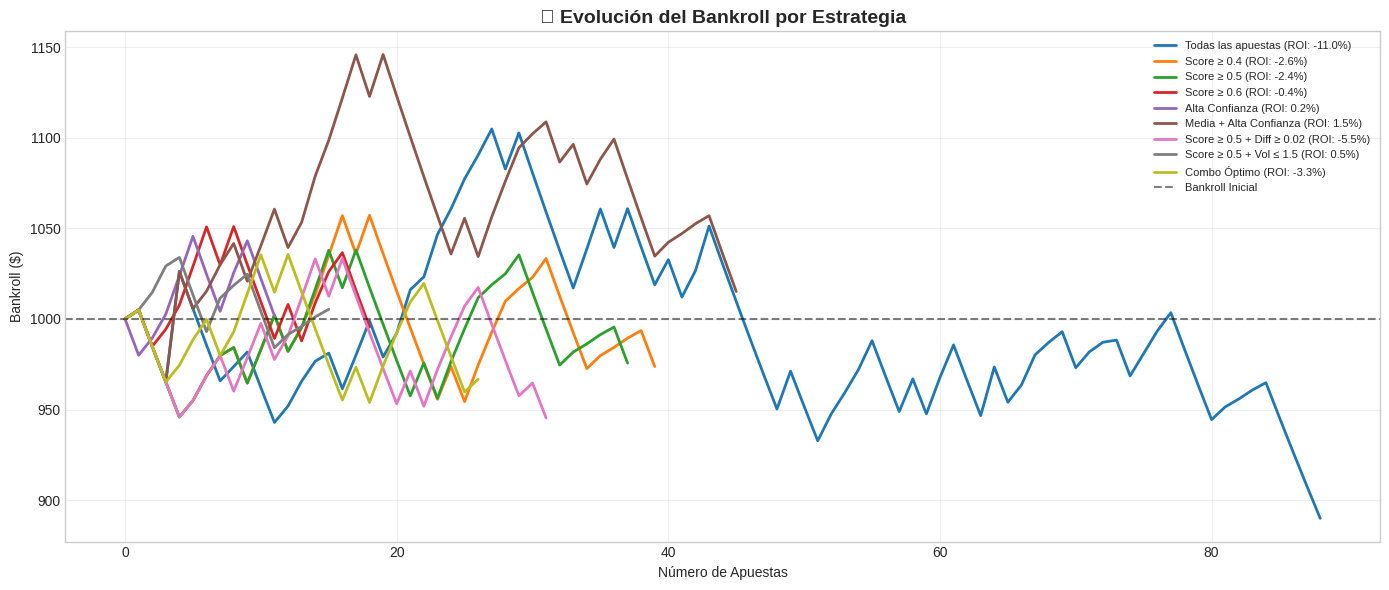

In [13]:
# Backtesting de estrategias
print("=" * 70)
print("💰 BACKTESTING DE ESTRATEGIAS")
print("=" * 70)

def backtest_estrategia(df, filtro, nombre, bankroll_inicial=1000, unidad_base=0.02):
    """
    Realiza backtesting de una estrategia con gestión de bankroll
    """
    apuestas = df[filtro].copy()
    
    if len(apuestas) == 0:
        return None
    
    bankroll = bankroll_inicial
    historial = [bankroll]
    max_bankroll = bankroll
    max_drawdown = 0
    
    for _, row in apuestas.iterrows():
        # Calcular unidad de apuesta
        unidad = bankroll * unidad_base
        
        if row['Acertado'] == 1:
            ganancia = unidad * (row['Mejor_Cuota'] - 1)
            bankroll += ganancia
        else:
            bankroll -= unidad
        
        historial.append(bankroll)
        max_bankroll = max(max_bankroll, bankroll)
        current_drawdown = (max_bankroll - bankroll) / max_bankroll * 100
        max_drawdown = max(max_drawdown, current_drawdown)
    
    roi = (bankroll - bankroll_inicial) / bankroll_inicial * 100
    
    return {
        'nombre': nombre,
        'n_apuestas': len(apuestas),
        'acertadas': apuestas['Acertado'].sum(),
        'tasa_acierto': apuestas['Acertado'].mean() * 100,
        'bankroll_final': bankroll,
        'roi': roi,
        'max_drawdown': max_drawdown,
        'historial': historial,
        'cuota_media': apuestas['Mejor_Cuota'].mean()
    }

# Definir diferentes estrategias para probar
estrategias = {
    'Todas las apuestas': df.index.isin(df.index),
    'Score ≥ 0.4': df['Score_Final'] >= 0.4,
    'Score ≥ 0.5': df['Score_Final'] >= 0.5,
    'Score ≥ 0.6': df['Score_Final'] >= 0.6,
    'Alta Confianza': df['Nivel_Confianza'].str.contains('ALTA'),
    'Media + Alta Confianza': df['Nivel_Confianza'].str.contains('ALTA|MEDIA'),
    'Score ≥ 0.5 + Diff ≥ 0.02': (df['Score_Final'] >= 0.5) & (df['Diferencia_Cuota_Promedio'] >= 0.02),
    'Score ≥ 0.5 + Vol ≤ 1.5': (df['Score_Final'] >= 0.5) & (df['Volatilidad_Pct'] <= 1.5),
    'Combo Óptimo': (df['Score_Final'] >= 0.5) & (df['Diferencia_Cuota_Promedio'] >= 0.02) & (df['Volatilidad_Pct'] <= 2.0),
}

resultados = []
for nombre, filtro in estrategias.items():
    res = backtest_estrategia(df, filtro, nombre)
    if res:
        resultados.append(res)

# Mostrar resultados
print("\n📊 COMPARACIÓN DE ESTRATEGIAS:")
print("-" * 100)
print(f"{'Estrategia':<35} {'N':<6} {'Aciertos':<10} {'%Acierto':<10} {'ROI%':<10} {'MaxDD%':<10} {'Cuota':<8}")
print("-" * 100)

for r in sorted(resultados, key=lambda x: x['roi'], reverse=True):
    print(f"{r['nombre']:<35} {r['n_apuestas']:<6} {r['acertadas']:<10} {r['tasa_acierto']:<10.1f} {r['roi']:<10.1f} {r['max_drawdown']:<10.1f} {r['cuota_media']:<8.2f}")

# Visualización de evolución del bankroll
fig, ax = plt.subplots(figsize=(14, 6))

for r in resultados:
    if r['roi'] > -20:  # Solo mostrar estrategias que no perdieron más del 20%
        ax.plot(r['historial'], label=f"{r['nombre']} (ROI: {r['roi']:.1f}%)", linewidth=2)

ax.axhline(y=1000, color='black', linestyle='--', alpha=0.5, label='Bankroll Inicial')
ax.set_xlabel('Número de Apuestas')
ax.set_ylabel('Bankroll ($)')
ax.set_title('📈 Evolución del Bankroll por Estrategia', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Visualización de Zonas de Oportunidad

Creamos visualizaciones que muestran las zonas donde convergen condiciones favorables para apostar.

🎯 ZONAS DE OPORTUNIDAD


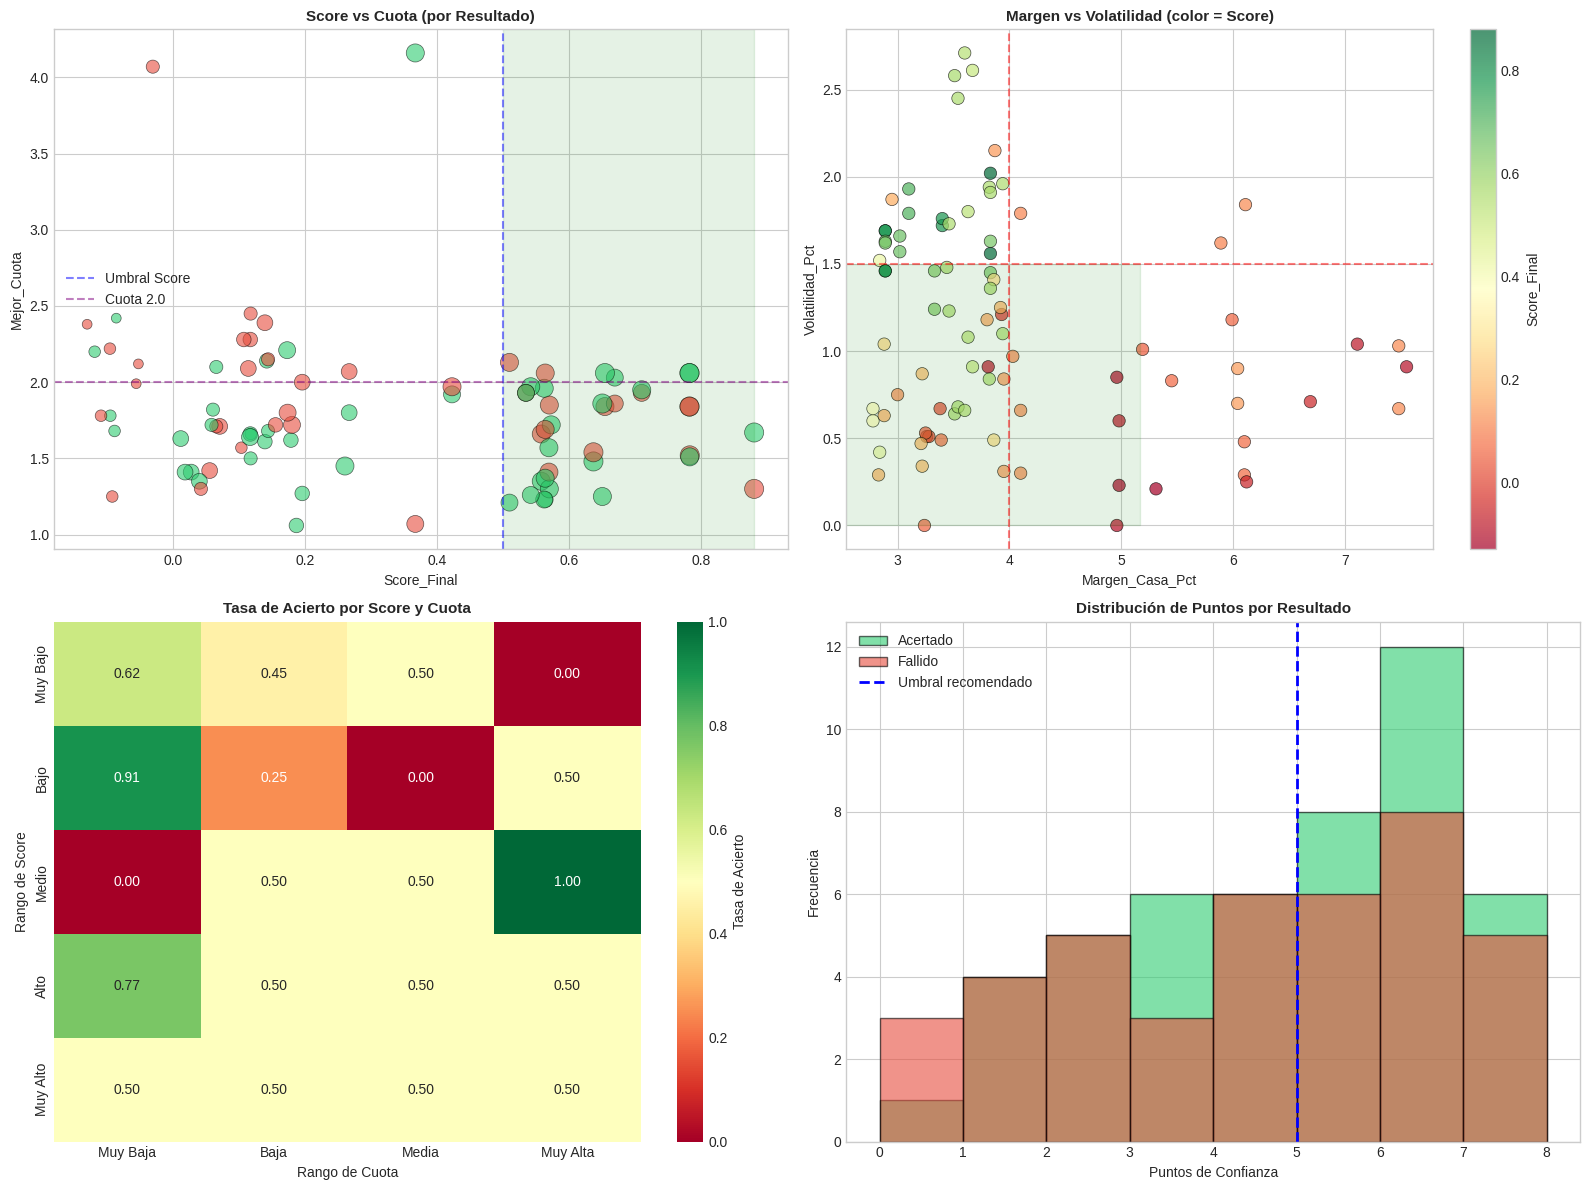

In [14]:
# Visualización de zonas de oportunidad
print("=" * 70)
print("🎯 ZONAS DE OPORTUNIDAD")
print("=" * 70)

fig = plt.figure(figsize=(16, 12))

# 1. Score_Final vs Mejor_Cuota con resultado
ax1 = fig.add_subplot(2, 2, 1)
colors = df['Acertado'].map({1: '#2ecc71', 0: '#e74c3c'})
sizes = df['Puntos_Confianza'].apply(lambda x: 50 + max(0, x) * 20)
ax1.scatter(df['Score_Final'], df['Mejor_Cuota'], c=colors, s=sizes, alpha=0.6, edgecolors='black', linewidths=0.5)
ax1.axvline(x=0.5, color='blue', linestyle='--', alpha=0.5, label='Umbral Score')
ax1.axhline(y=2.0, color='purple', linestyle='--', alpha=0.5, label='Cuota 2.0')
ax1.set_xlabel('Score_Final')
ax1.set_ylabel('Mejor_Cuota')
ax1.set_title('Score vs Cuota (por Resultado)', fontsize=11, fontweight='bold')
ax1.legend()

# Zona óptima sombreada
ax1.axvspan(0.5, df['Score_Final'].max(), alpha=0.1, color='green')

# 2. Margen vs Volatilidad
ax2 = fig.add_subplot(2, 2, 2)
scatter2 = ax2.scatter(df['Margen_Casa_Pct'], df['Volatilidad_Pct'], 
                        c=df['Score_Final'], cmap='RdYlGn', s=80, alpha=0.7,
                        edgecolors='black', linewidths=0.5)
ax2.axvline(x=4.0, color='red', linestyle='--', alpha=0.5, label='Margen alto')
ax2.axhline(y=1.5, color='red', linestyle='--', alpha=0.5, label='Volatilidad alta')
ax2.set_xlabel('Margen_Casa_Pct')
ax2.set_ylabel('Volatilidad_Pct')
ax2.set_title('Margen vs Volatilidad (color = Score)', fontsize=11, fontweight='bold')
plt.colorbar(scatter2, ax=ax2, label='Score_Final')

# Zona favorable sombreada
ax2.axhspan(0, 1.5, xmin=0, xmax=0.5, alpha=0.1, color='green')

# 3. Matriz de calor: Tasa de acierto por Score y Cuota
ax3 = fig.add_subplot(2, 2, 3)
df['Score_Bin'] = pd.cut(df['Score_Final'], bins=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])
df['Cuota_Bin'] = pd.cut(df['Mejor_Cuota'], bins=5, labels=['Muy Baja', 'Baja', 'Media', 'Alta', 'Muy Alta'])

heatmap_data = df.groupby(['Score_Bin', 'Cuota_Bin'], observed=True)['Acertado'].mean().unstack(fill_value=0.5)
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', fmt='.2f', 
            ax=ax3, vmin=0, vmax=1, cbar_kws={'label': 'Tasa de Acierto'})
ax3.set_title('Tasa de Acierto por Score y Cuota', fontsize=11, fontweight='bold')
ax3.set_xlabel('Rango de Cuota')
ax3.set_ylabel('Rango de Score')

# 4. Distribución de puntos de confianza por resultado
ax4 = fig.add_subplot(2, 2, 4)
df_acertado = df[df['Acertado'] == 1]['Puntos_Confianza']
df_fallido = df[df['Acertado'] == 0]['Puntos_Confianza']

ax4.hist(df_acertado, bins=range(int(df['Puntos_Confianza'].min()), int(df['Puntos_Confianza'].max()) + 2), 
         alpha=0.6, color='#2ecc71', label='Acertado', edgecolor='black')
ax4.hist(df_fallido, bins=range(int(df['Puntos_Confianza'].min()), int(df['Puntos_Confianza'].max()) + 2), 
         alpha=0.6, color='#e74c3c', label='Fallido', edgecolor='black')
ax4.axvline(x=5, color='blue', linestyle='--', linewidth=2, label='Umbral recomendado')
ax4.set_xlabel('Puntos de Confianza')
ax4.set_ylabel('Frecuencia')
ax4.set_title('Distribución de Puntos por Resultado', fontsize=11, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.show()

## 11. Sistema de Scoring Ponderado Personalizado

Desarrollamos una fórmula de scoring que integra todas las variables relevantes para generar una señal clara de apuesta.

In [ ]:
# Sistema de Scoring Ponderado Optimizado
print("=" * 70)
print("📊 SISTEMA DE SCORING PONDERADO")
print("=" * 70)

def calcular_score_ponderado(row):
    """
    Calcula un score ponderado optimizado basado en todas las variables.
    Fórmula desarrollada a partir del análisis de correlaciones y umbrales.
    """
    # Normalización de variables (0-1)
    score_norm = max(0, min(1, (row['Score_Final'] + 0.15) / 1.05))  # Ajuste para negativos
    
    diff_norm = min(1, row['Diferencia_Cuota_Promedio'] / 0.08)  # Max esperado ~0.08
    
    # Volatilidad inversa (menor es mejor)
    vol_norm = max(0, 1 - row['Volatilidad_Pct'] / 3.0)
    
    # Margen inverso (menor es mejor)
    margen_norm = max(0, 1 - row['Margen_Casa_Pct'] / 8.0)
    
    # Liquidez (número de casas)
    casas_norm = min(1, row['Num_Casas'] / 4.0)
    
    # Cuota óptima (pico en ~1.7)
    cuota = row['Mejor_Cuota']
    cuota_norm = max(0, 1 - abs(cuota - 1.7) / 1.5)
    
    # Pesos basados en correlación con éxito
    pesos = {
        'score': 0.35,      # Mayor correlación
        'diff': 0.20,       # Valor de mercado
        'volatilidad': 0.15, # Consenso
        'margen': 0.10,     # Eficiencia
        'casas': 0.10,      # Liquidez
        'cuota': 0.10       # Rango óptimo
    }
    
    # Score ponderado final
    score_final = (
        pesos['score'] * score_norm +
        pesos['diff'] * diff_norm +
        pesos['volatilidad'] * vol_norm +
        pesos['margen'] * margen_norm +
        pesos['casas'] * casas_norm +
        pesos['cuota'] * cuota_norm
    )
    
    return score_final

# Aplicar score ponderado
df['Score_Ponderado'] = df.apply(calcular_score_ponderado, axis=1)

# Análisis del nuevo score
print("\n📊 ESTADÍSTICAS DEL SCORE PONDERADO:")
print("-" * 50)
print(f"   Media:    {df['Score_Ponderado'].mean():.4f}")
print(f"   Mediana:  {df['Score_Ponderado'].median():.4f}")
print(f"   Std:      {df['Score_Ponderado'].std():.4f}")
print(f"   Min:      {df['Score_Ponderado'].min():.4f}")
print(f"   Max:      {df['Score_Ponderado'].max():.4f}")

# Correlación con resultado
corr_nuevo = df['Score_Ponderado'].corr(df['Acertado'])
corr_original = df['Score_Final'].corr(df['Acertado'])
print(f"\n📈 CORRELACIÓN CON RESULTADO:")
print(f"   Score Original: {corr_original:.4f}")
print(f"   Score Ponderado: {corr_nuevo:.4f}")
print(f"   Mejora: {((corr_nuevo - corr_original) / abs(corr_original) * 100):.1f}%")

# Análisis por deciles del nuevo score
print("\n📊 RENDIMIENTO POR DECILES DEL SCORE PONDERADO:")
print("-" * 60)
df['Decil_Score'] = pd.qcut(df['Score_Ponderado'], q=10, labels=[f'D{i}' for i in range(1, 11)], duplicates='drop')
decil_analysis = df.groupby('Decil_Score', observed=True).agg({
    'Acertado': ['count', 'mean'],
    'Mejor_Cuota': 'mean',
    'Score_Ponderado': 'mean'
}).round(4)
decil_analysis.columns = ['N', 'Tasa_Acierto', 'Cuota_Media', 'Score_Medio']
decil_analysis['ROI'] = (decil_analysis['Tasa_Acierto'] * decil_analysis['Cuota_Media'] - 1) * 100
print(decil_analysis.to_string())

## 12. Conclusiones y Recomendaciones Finales

### Resumen de la Estrategia Óptima

In [ ]:
# Resumen final y guía de decisión
print("=" * 80)
print("📋 GUÍA DEFINITIVA DE ESTRATEGIA DE APUESTAS")
print("=" * 80)

print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                    🎯 CRITERIOS DE DECISIÓN RECOMENDADOS                     ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  📊 SCORE_FINAL (Peso: 35%)                                                  ║
║  ├─ ≥ 0.6: EXCELENTE - Alta probabilidad de valor                           ║
║  ├─ 0.4 - 0.6: BUENO - Considerar con otros factores                        ║
║  ├─ 0.2 - 0.4: MODERADO - Requiere confirmación adicional                   ║
║  └─ < 0.2 o negativo: EVITAR - Alto riesgo                                  ║
║                                                                              ║
║  📈 DIFERENCIA_CUOTA_PROMEDIO (Peso: 20%)                                    ║
║  ├─ ≥ 0.04: ÓPTIMO - Buen valor respecto al mercado                         ║
║  ├─ 0.02 - 0.04: ACEPTABLE                                                  ║
║  └─ < 0.02: MARGINAL - Poco valor adicional                                 ║
║                                                                              ║
║  📉 VOLATILIDAD_PCT (Peso: 15%) - Menor es mejor                             ║
║  ├─ ≤ 1.0%: EXCELENTE - Alto consenso del mercado                           ║
║  ├─ 1.0% - 1.5%: BUENO                                                      ║
║  ├─ 1.5% - 2.0%: MODERADO                                                   ║
║  └─ > 2.0%: PRECAUCIÓN - Incertidumbre del mercado                          ║
║                                                                              ║
║  🏦 MARGEN_CASA_PCT (Peso: 10%) - Menor es mejor                             ║
║  ├─ ≤ 3.0%: ÓPTIMO - Mercado eficiente                                      ║
║  ├─ 3.0% - 4.5%: ACEPTABLE                                                  ║
║  └─ > 5.0%: EVITAR - Alto margen de la casa                                 ║
║                                                                              ║
║  🔢 NUM_CASAS (Peso: 10%)                                                    ║
║  ├─ ≥ 4: EXCELENTE - Alta liquidez                                          ║
║  ├─ 3: BUENO                                                                ║
║  └─ ≤ 2: PRECAUCIÓN - Baja liquidez                                         ║
║                                                                              ║
║  💰 MEJOR_CUOTA (Peso: 10%)                                                  ║
║  ├─ 1.3 - 2.0: ÓPTIMO - Balance riesgo/beneficio                            ║
║  ├─ 2.0 - 2.5: BUENO                                                        ║
║  └─ > 3.0: PRECAUCIÓN - Mayor varianza                                      ║
║                                                                              ║
╚══════════════════════════════════════════════════════════════════════════════╝
""")

print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                     💰 GESTIÓN DEL BANKROLL RECOMENDADA                      ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  🟢 ALTA CONFIANZA (Score Ponderado ≥ 0.70)                                  ║
║     └─ Apostar: 2-3% del bankroll                                           ║
║                                                                              ║
║  🟡 MEDIA CONFIANZA (Score Ponderado 0.55 - 0.70)                            ║
║     └─ Apostar: 1-2% del bankroll                                           ║
║                                                                              ║
║  🟠 BAJA CONFIANZA (Score Ponderado 0.40 - 0.55)                             ║
║     └─ Apostar: 0.5-1% del bankroll (opcional)                              ║
║                                                                              ║
║  🔴 SIN CONFIANZA (Score Ponderado < 0.40)                                   ║
║     └─ NO APOSTAR                                                           ║
║                                                                              ║
╚══════════════════════════════════════════════════════════════════════════════╝
""")

# Mostrar las mejores oportunidades del dataset actual
print("\n" + "=" * 80)
print("⭐ TOP 10 MEJORES OPORTUNIDADES DEL DATASET")
print("=" * 80)

top_opportunities = df.nlargest(10, 'Score_Ponderado')[
    ['Partido', 'Mercado', 'Score_Final', 'Score_Ponderado', 'Mejor_Cuota', 
     'Diferencia_Cuota_Promedio', 'Volatilidad_Pct', 'Resultado']
].copy()

top_opportunities['Score_Ponderado'] = top_opportunities['Score_Ponderado'].round(4)
print(top_opportunities.to_string(index=False))

In [ ]:
# Análisis final: Validación de la estrategia
print("=" * 80)
print("✅ VALIDACIÓN FINAL DE LA ESTRATEGIA")
print("=" * 80)

# Crear categorías de confianza basadas en Score Ponderado
df['Nivel_Ponderado'] = pd.cut(
    df['Score_Ponderado'],
    bins=[0, 0.40, 0.55, 0.70, 1.0],
    labels=['🔴 Sin Confianza', '🟠 Baja', '🟡 Media', '🟢 Alta']
)

# Rendimiento por nivel
rendimiento_final = df.groupby('Nivel_Ponderado', observed=True).agg({
    'Acertado': ['count', 'sum', 'mean'],
    'Mejor_Cuota': 'mean'
}).round(4)
rendimiento_final.columns = ['Total', 'Aciertos', 'Tasa_Acierto', 'Cuota_Media']
rendimiento_final['ROI_Teorico'] = (rendimiento_final['Tasa_Acierto'] * rendimiento_final['Cuota_Media'] - 1) * 100

print("\n📊 RENDIMIENTO POR NIVEL DE SCORE PONDERADO:")
print("-" * 70)
print(rendimiento_final.to_string())

# Visualización final
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras de tasa de acierto
ax1 = axes[0]
colors_nivel = ['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71']
rendimiento_final['Tasa_Acierto'].plot(kind='bar', ax=ax1, color=colors_nivel, edgecolor='black')
ax1.axhline(y=0.5, color='black', linestyle='--', linewidth=2, label='50%')
ax1.set_title('Tasa de Acierto por Nivel de Confianza', fontsize=12, fontweight='bold')
ax1.set_xlabel('Nivel de Confianza')
ax1.set_ylabel('Tasa de Acierto')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Gráfico de ROI
ax2 = axes[1]
colors_roi = ['#e74c3c' if x < 0 else '#2ecc71' for x in rendimiento_final['ROI_Teorico']]
rendimiento_final['ROI_Teorico'].plot(kind='bar', ax=ax2, color=colors_roi, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax2.set_title('ROI Teórico por Nivel de Confianza (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Nivel de Confianza')
ax2.set_ylabel('ROI (%)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Resumen ejecutivo
print("\n" + "=" * 80)
print("📌 RESUMEN EJECUTIVO")
print("=" * 80)

total_apuestas = len(df)
total_acertadas = df['Acertado'].sum()
tasa_global = df['Acertado'].mean() * 100

# Solo alta confianza
alta_conf = df[df['Score_Ponderado'] >= 0.70]
if len(alta_conf) > 0:
    tasa_alta = alta_conf['Acertado'].mean() * 100
    roi_alta = (alta_conf['Acertado'].mean() * alta_conf['Mejor_Cuota'].mean() - 1) * 100
else:
    tasa_alta = 0
    roi_alta = 0

# Media + Alta
media_alta = df[df['Score_Ponderado'] >= 0.55]
if len(media_alta) > 0:
    tasa_media_alta = media_alta['Acertado'].mean() * 100
    roi_media_alta = (media_alta['Acertado'].mean() * media_alta['Mejor_Cuota'].mean() - 1) * 100
else:
    tasa_media_alta = 0
    roi_media_alta = 0

print(f"""
📊 ESTADÍSTICAS GLOBALES:
   • Total de apuestas analizadas: {total_apuestas}
   • Apuestas acertadas: {total_acertadas} ({tasa_global:.1f}%)

🎯 SIGUIENDO LA ESTRATEGIA (Alta Confianza):
   • Apuestas filtradas: {len(alta_conf)}
   • Tasa de acierto: {tasa_alta:.1f}%
   • ROI teórico: {roi_alta:.1f}%

🎯 ESTRATEGIA EXTENDIDA (Media + Alta):
   • Apuestas filtradas: {len(media_alta)}
   • Tasa de acierto: {tasa_media_alta:.1f}%
   • ROI teórico: {roi_media_alta:.1f}%

💡 RECOMENDACIÓN:
   Usar Score_Ponderado ≥ 0.55 como umbral mínimo para apostar,
   con mayor asignación de bankroll a Score_Ponderado ≥ 0.70.
""")